# Predict Future Sales  Contents

## 1. [Data Load](#1)
   - 1.0 [Item categories](#1.0)
   - 1.1 [Items](#1.1)
   - 1.2 [Sales_data](#1.2)
   - 1.3 [Shops](#1.3)
   - 1.4 [Sample_submission](#1.4)
   - 1.5 [Data-merge](#1.5)
       
       
## 2. [Exploratory Data Analysis (EDA)](#2)
   - 2.0 [Outliner Check](#2.0)
   - 2.1  [매장별 매출 순위](#2.1)
       - 2.1.1 [Top 10 Store](#2.1.1)       
   - 2.2 [매장별 판매량 순위](#2.2)
       - 2.1.2 [Top 10 Store](#2.2.1)
   - 2.3 [매장별 매출 기준 Top10 아이템](#2.3) 
   - 2.4 [매장별 매출 기준 Worst10 아이템](#2.4)
   - 2.5 [매장별 판매량 기준 Worst10 아이템](#2.5)
   - 2.6 [아이템 매출별 순위](#2.6)
   - 2.7 [아이템 판매량 순위](#2.7)
   - 2.8 [연도별 아이템 매출 순위](#2.8)
       - 2.8.1 [매출 Top7의 추세](#2.8.1)
   - 2.9 [연도별 아이템 판매량 순위](#2.9)
        - 2.9.1 [판매량 Top9의 추세](#2.9.1)
        - 2.9.2 [월별 총매출 추이](#2.9.2)
        - 2.9.3[월별 총판매량 추이](#2.9.3)
   - 2.9.4 [매장 시각화](#2.9.4)

   
## 3. [Data Preprocessing](#3)
   - ~~3.0 [Game Ticket Remove Outliner](#3.1)~~
   - 3.1 [Item_price Remove Outliner](#3.2)
   - 3.2 [Item_cnt_day Remove Outliner](#3.3)

## 4. [Derivation Feature](#4)
   - 4.0 [Template DataFrame](#4.0)
   - 4.1 [Discount, max-min, price max, min](#4.1)
   - 4.2 [Lag12, 6, 3, 2, 1](#4.2)
   - 4.3 [Global_item_price & Local_item_price ](#4.3)
   - 4.4 [Nearest shop](#4.4)
   - 4.5 [Top3](#4.5)
   - 4.6 [Label Encoding](#4.6)
   - 4.7 [Test DataFrame](#4.7)
   
## 5. [Modeling](#5)
   - 5.0 [PCA](#5.0)
   - 5.1 [LightGBM](#5.1)
   - 5.2 [LightGBM Regressor](#5.2)
   - 5.3 [Baysian-Optimization](#5.3)
   - 5.4 [Randomizd Grid SearchCV](#5.4)

## 6. [Submission](#6)
   - 6.0 [submission](#6.0)
   - 6.1 [CNT_ZERO](#6.1)


# Predict Future Sales

- 1991년에 설립된 1C 회사는 대중 시장 소프트웨어의 개발, 유통, 출판 및 지원을 전문으로 한다.

- 현재 600개 도시의 8000개 딜러들이 1C와 협력하고 있다. 약 7500개의 팀이 1C를 구성한다.1C 제품의 주요 부가 가치 채널인 프랜차이즈 파트너 네트워크. 서비스 파트너는 1C 소프트웨어 고객을 위해 정기적인 정보 및 기술 지원을 제공한다. 공인훈련소 네트워크도 가동되고 있다.

- 1C는 마이크로소프트, Novell, 볼랜드, 시만텍, ABBYY, 카스퍼스키랩, ProMT, Eset Software와 같은 세계적으로 유명한 공급업체의 공식 대리점이다. 1C는 사무실과 가정용으로 10,000개 이상의 소프트웨어를 제공한다.




- 이 도전은 '데이터 과학 경진대회 우승 방법' 쿠세라 코스의 최종 프로젝트 역할을 한다.

- 이 대회에서 당신은 러시아 최대의 소프트웨어 회사 중 하나인 1C 회사에 의해 친절하게 제공되는 일일 판매 데이터로 구성된 까다로운 시계열 데이터셋으로 작업할 것이다.

- 우리는 당신에게 다음 달에 모든 상품과 매장의 총 매출을 예측해 달라는 것이다. 이 경쟁을 해결함으로써 당신은 당신의 데이터 과학 기술을 적용하고 향상시킬 수 있을 것이다.

- 제출은 RMSE(Root Mean Squared Error)로 평가된다. 진정한 목표값은 [0,20] 범위로 잘려져 있다.

- 제출 파일
  - ID,item_cnt_month
  - 0,0.5
  - 1,0.5
  - 2,0.5
  - 3,0.5
  - etc.

- 테스트 세트의 각 ID에 대해 총 판매 수를 예측해야 한다. 파일에는 헤더가 포함되어야 하며 다음과 같은 형식을 가져야 한다.

- 일일 기록 판매 데이터를 제공받으셨습니다. 과제는 테스트 세트의 모든 매장에서 판매되는 제품의 총량을 예측하는 것이다. 상점 및 제품의 목록은 매월 약간씩 변경된다는 점에 유의하십시오. 그러한 상황을 처리할 수 있는 강력한 모델을 만드는 것은 도전의 일부분이다.

### File descriptions

- sales_train.csv - 교육 세트. 2013년 1월부터 2015년 10월까지의 일일자료.

- test.csv - 테스트 세트. 2015년 11월 이 상점들과 제품들의 판매량을 예측해야 한다.

- sample_submission.csv - 올바른 형식의 샘플 제출 파일.

- items.csv - 항목/제품에 대한 보충 정보.

- item_categories.csv - 항목 범주에 대한 추가 정보.

- shops.csv - 상점에 대한 추가 정보.

### Data fields

- ID - 테스트 세트 내에서 (Shop, Item) 튜플을 나타내는 ID

- shop_id - 상점 고유 식별자

- item_id - 제품의 고유 식별자

- item_category_id - 항목 범주의 고유 식별자

- item_cnt_day - 판매된 제품 수입니다. 이 측정값의 월별 금액을 예측하는 경우

- item_price - 품목의 현재 가격

- date - dd/mm/yyyy 형식 날짜

- date_block_num - 편의를 위해 사용되는 연속 월 번호. 2013년 1월 0일, 2013년 2월 1일, 2015년 10월 33일

- item_name - 항목 이름

- shop_name - 상점 이름

- item_category_name - 항목 범주 이름

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import sklearn as sk
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.linear_model as linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression #logistic regression

from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

## 1. DATA LOAD<a id= "1" />

### item_categories<a id= "1.0" />

In [2]:
item_categories = pd.read_csv('data/item_categories.csv')
item_categories.head() #항목 범주에 대한 추가 정보.

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [3]:
item_categories.item_category_id.unique() 

#84개의 범주가 있다.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
      dtype=int64)

In [4]:
item_categories.item_category_name.unique()

array(['PC - Гарнитуры/Наушники', 'Аксессуары - PS2', 'Аксессуары - PS3',
       'Аксессуары - PS4', 'Аксессуары - PSP', 'Аксессуары - PSVita',
       'Аксессуары - XBOX 360', 'Аксессуары - XBOX ONE', 'Билеты (Цифра)',
       'Доставка товара', 'Игровые консоли - PS2',
       'Игровые консоли - PS3', 'Игровые консоли - PS4',
       'Игровые консоли - PSP', 'Игровые консоли - PSVita',
       'Игровые консоли - XBOX 360', 'Игровые консоли - XBOX ONE',
       'Игровые консоли - Прочие', 'Игры - PS2', 'Игры - PS3',
       'Игры - PS4', 'Игры - PSP', 'Игры - PSVita', 'Игры - XBOX 360',
       'Игры - XBOX ONE', 'Игры - Аксессуары для игр',
       'Игры Android - Цифра', 'Игры MAC - Цифра',
       'Игры PC - Дополнительные издания',
       'Игры PC - Коллекционные издания', 'Игры PC - Стандартные издания',
       'Игры PC - Цифра', 'Карты оплаты (Кино, Музыка, Игры)',
       'Карты оплаты - Live!', 'Карты оплаты - Live! (Цифра)',
       'Карты оплаты - PSN', 'Карты оплаты - Windows (Цифра)',

'PC-헤드셋 / 헤드폰', '액세서리-PS2', '액세서리-PS3', '액세서리-PS4', '액세서리-PSP', '액세서리-PSVita', '액세서리-XBOX 360', '액세서리-XBOX ONE', '티켓 (번호)', '상품 배송', '게임 콘솔-PS2', '게임 콘솔-PS3', '게임 콘솔-PS4', '게임 콘솔-PSP', '게임 콘솔-PSVita', '게임 콘솔-XBOX 360', '게임 콘솔-XBOX ONE', '게임 콘솔-기타', '게임-PS2', '게임-PS3', '게임-PS4', '게임-PSP', '게임-PSVita', '게임-XBOX 360', '게임-XBOX ONE', '게임-게임용 액세서리', 'Android 게임-숫자', 'MAC 게임-숫자', 'PC 게임-추가 에디션', 'PC Games-Collector 's Editions', 'PC Games-Standard Editions', 'PC 게임-숫자', '결제 카드 (영화, 음악, 게임)', '결제 카드-Live!', '결제 카드-Live! (숫자)', '결제 카드-PSN', '결제 카드-Windows (Digit)', 'Cinema-Blu-Ray', 'Cinema-Blu-Ray 3D', 'Cinema-Blu-Ray 4K', '시네마-DVD', '시네마-수집가', '책-아트 북, 백과 사전', '책-오디오 북', '책-오디오 북 (디지털)', '책-오디오 북 1C', '도서-비즈니스 문학', '도서-만화, 만화', '책-컴퓨터 문학', '책-방법론 자료 1C', '책-엽서', '책-인지 문학', '책-가이드', '책-소설', '책-숫자', '음악-현지 제작 CD', '음악-브랜드 CD', '음악-MP3', '음악-비닐', '음악-뮤직 비디오', '음악-선물용 에디션', '선물-속성', '선물-가제트, 로봇, 스포츠', '선물-부드러운 장난감', '선물-보드 게임', '선물-보드 게임 (콤팩트)', '선물-엽서, 스티커', '선물-개발', '선물-인증서, 서비스', '선물-기념품', '선물-기념품 (힌지)', '선물-가방, 앨범, 마우스 패드', '선물-피규어', '프로그램-1C : Enterprise 8', '프로그램-MAC (Digit)', '프로그램-가정 및 사무실 용', '프로그램-가정 및 사무실 용 (디지털)', '프로그램-교육용', '프로그램-교육용 (디지털)', '서비스', '서비스-티켓', '빈 미디어 (첨탑)', '빈 미디어 (조각)', '배터리'

### items<a id= "1.1" />

In [5]:
items = pd.read_csv('data/items.csv')


In [6]:
items.item_id.unique() #22169 아이템 아이디 22170개

array([    0,     1,     2, ..., 22167, 22168, 22169], dtype=int64)

### sales_train<a id= "1.2" />

In [7]:
sales_train = pd.read_csv('data/sales_train.csv')
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


### shops<a id= "1.3" />

In [8]:
shops = pd.read_csv('data/shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
shops.shop_id.unique() #60개 지점

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

### 매장 정보에 관한 것

In [10]:
'''# 샵1 

- !Якутск Орджоникидзе, 56 фран
- 러시아 - 번화가 - 야쿠츠크 사카(야쿠티야) 러시아 677027
- 62.025173, 129.720232
- https://goo.gl/maps/SuyUEjuKL9HHMvGW9

# 샵2 
- !Якутск ТЦ "Центральный" фран
- 찾느라 굉장히 오래걸림... 영화관인것 같다.
- 이유는 캐글데이터 구매 아이템명들이 다 영화관련이고 구글 리뷰를 통해 추측
- Prospekt Lenina, 12, Yakutsk, Sakha Republic, 러시아 677000 - 영화관
- 62.031050, 129.738358
- https://goo.gl/maps/9LTNpX5vwAkWrHbK7

# 샵3 
- Адыгея ТЦ "Мега"
- 러시아 - 종합쇼핑몰 아디게야 러시아
- 45.012745, 38.930380
- https://goo.gl/maps/sg1NfPDW97BuJARZ8

# 샵4 
- Балашиха ТРК "Октябрь-Киномир"
- Shop 1C Interest - 폐쇄됨
- 러시아 발라시하 모스콥스카야
- 55.797801, 37.938447
- https://goo.gl/maps/hWEt8FGuWYJjvv8w9

# 샵5 
- Волжский ТЦ "Волга Молл"
- 볼츠스키 러시아 Volgograd Oblast - 종합쇼핑몰
- 48.771953, 44.799820
- https://goo.gl/maps/9vhPjWmRF7zzfHio9

# 샵6
- Вологда ТРЦ "Мармелад"
- 볼 로그 다 쇼핑 센터 "마멀레이드"
- 59.211624, 39.880350
- https://goo.gl/maps/T1TpbnWtBeLGiQ5G6

# 샵7
- Воронеж (Плехановская, 13)
- 보로네슈 러시아 보로네즈스카야 오블래스트 - 종합쇼핑몰
- 51.663607, 39.197213
- https://goo.gl/maps/cnKroFKmXcLj2XJq8

# 샵8
- Воронеж ТРЦ "Максимир"
- 보로네슈 러시아 보로네즈스카야 오블래스트 - 종합쇼핑몰
- 51.696888, 39.273251
- https://goo.gl/maps/QRYi7jz4tPwDWw639

# 샾9
- Воронеж ТРЦ Сити-Парк "Град"
- 보로네즈스카야 오블래스트 러시아 - 종합쇼핑몰
- 51.788890, 39.204999
- https://goo.gl/maps/9EdW9dZJ9QAPkiX56

# 샵10
- Выездная Торговля
- 번역하면 아웃바운드 무역
- 지도상에 안나온다

# 샵11
- Жуковский ул. Чкалова 39м?
- 거리상권 - 검색하면 주차장으로 나온다.
- 55.597068, 38.123647
- https://goo.gl/maps/cW63ESWExGG61y656

# 샵12
- Жуковский ул. Чкалова 39м²
- 러시아모스콥스카야 쥬코브스키
- 55.597068, 38.123651
- https://goo.gl/maps/PAtRnzjr2KYPA6SU7
- 샵11과 샵12는 동일한 장소로 나온다.

# 샵13
- Интернет-магазин ЧС
- 긴급 온라인 상점

# 샵14
- Казань ТЦ "Бехетле"
- 카잔 러시아 타타르스탄 - 쇼핑몰
- 55.863114, 49.084688
- https://goo.gl/maps/XSmzrALpcAaBPR9Q9

# 샵15
- Казань ТЦ "ПаркХаус" II
- 카잔 러시아 타타르스탄 - 쇼핑몰, 샵이름 짝대기 두개는 2층을 뜻하는거지 않을까?
- 55.829494, 49.117868
- https://goo.gl/maps/FNJyYHq6gGcxwrND9

# 샵16
- Калуга ТРЦ "XXI век"
- Ulitsa Kirova, 1, Kaluga, Kaluga Oblast, 러시아 248000 - 쇼핑몰
- 54.516108, 36.246523
- https://goo.gl/maps/Ppg1Pg7nBDxMYNc37

# 샵17
- Коломна ТЦ "Рио"
- Kolomna, Moscow Oblast, 러시아 140406 - 쇼핑몰
- 55.083909, 38.801003
- https://goo.gl/maps/2uLY5Na3zW1zaN3J8

# 샵18
- Красноярск ТЦ "Взлетка Плаза"
- Ulitsa Vesny, 1, Krasnoyarsk, Krasnoyarsk Krai, 러시아 660077 - 쇼핑몰
- 56.034478, 92.907737
- https://goo.gl/maps/9FVZ6eG9wcGno4yn7

# 샵19
- Красноярск ТЦ "Июнь"
- Ulitsa Partizana Zheleznyaka, 23, Krasnoyarsk, Krasnoyarsk Krai, 러시아 660113 - 쇼핑몰(외지에 있어보임)
- 56.037267, 92.934535
- https://goo.gl/maps/jQJ5Fzo4rMTrgyMq6

# 샵20
- Курск ТЦ "Пушкинский"
- Ulitsa Lenina, 30, Kursk, Kurskaya oblast', 러시아 305000 - 쇼핑몰
- 51.737992, 36.192407
- https://goo.gl/maps/5xY3HrKo4fWZSAzW7

# 샵21
- Москва "Распродажа" 
- 번역하면 모스크바 "판매"
- 인터넷마케팅 서비스를 하는 곳으로 나온다. 쇼핑몰은 아니다.
- 55.702794, 37.735900
- https://goo.gl/maps/EsnyBVCZPUMJNyyg7

# 샵22
- Москва МТРЦ "Афи Молл"
- Presnenskaya Naberezhnaya, 2, Moscow, 러시아 123112 - 쇼핑몰
- 55.748955, 37.539729
- https://goo.gl/maps/xgUXL4FKSgrHhrpP9

# 샵23
- Москва Магазин С21
- 이대로 검색하면 안나와서 숫자 21 빼고 검색함 그랬더니 모스크바 전자제품 c스토어 나옴 숫자는 매장번호이지 않을까?
- 모스크바 러시아
- 55.760993, 37.610690
- https://goo.gl/maps/NXMZqbDouS5ofBD87

# 샵24
- Москва ТК "Буденовский" (пав.А2)
- (пав.А2)를 번역하면 (A2 층)
- Prospekt Budennogo, 53, Moscow, 러시아 105275 - 쇼핑몰
- https://goo.gl/maps/42WgeM6bgY4xNejr6


# 샵25
- Москва ТК "Буденовский" (пав.К7)
- (пав.К7)를 번역하면 (홀 K7)
- 샵24와 샵25는 같은 건물에 장소만 다르다.
- Prospekt Budennogo, 53, Moscow, 러시아 105275 - 쇼핑몰
- https://goo.gl/maps/42WgeM6bgY4xNejr6

# 샵26
- Москва ТРК "Атриум"
- Zemlyanoy Val St, 33, Moscow, 러시아 105064 - 쇼핑몰
- 55.757262, 37.659089
- https://goo.gl/maps/g3WEdRZiGyiLtuHw7

# 샵27
- Москва ТЦ "Ареал" (Беляево)
- Ulitsa Profsoyuznaya, 102 строение 1, Moscow, 러시아 117485 - 쇼핑몰
- 55.643788, 37.526460
- https://goo.gl/maps/SptY1L977fDL42uF6

# 샵28
- Москва ТЦ "МЕГА Белая Дача II"
- 1-Y Pokrovskiy Proyezd, 5, Moscow, Moscow Oblast, 러시아 140055 - 쇼핑몰
- 55.658320, 37.845215
- https://goo.gl/maps/vhFztgCZU2p4BLkU7

# 샵29
- Москва ТЦ "МЕГА Теплый Стан" II
- Калужское ш., 21-й км, Moscow, 러시아 142704 - 쇼핑몰
- 55.604199, 37.491871
- https://goo.gl/maps/Vik6fTihb2BqvFpc7

# 샵30
- Москва ТЦ "Новый век" (Новокосино)
- Ulitsa Novokosinskaya, 14а, Moscow, 러시아 111672 - 쇼핑센터(작음)
- 55.737751, 37.857074
- https://goo.gl/maps/8fmNm6B5xWvpjsyN8


# 샵31
- Москва ТЦ "Перловский"
- Ulitsa Selezneva, 33, Mytishchi, Moscow Oblast, 러시아 141022 - 쇼핑몰(작음)
- 55.891909, 37.727590
- https://goo.gl/maps/8iVLVwvoV31dKkWh8

# 샵32
- Москва ТЦ "Семеновский"
- Semenovskaya Ploshchad', 1, Moscow, 러시아 105318 - 쇼핑몰
- 55.782863, 37.720300
- https://goo.gl/maps/na3QYh6hAfuXsT4u6
 
# 샵33
- Москва ТЦ "Серебряный Дом"
- B. Semyenovskaya St, 16, Moscow, 러시아 107023 - 쇼핑몰
- 55.782122, 37.704086
- https://goo.gl/maps/sfRXJk8zF7d2FpyU9

# 샵34
- Мытищи ТРК "XL-3"
- 검색하면 안나와서 Мытищи ТРК로만 검색함 그랬더니 쇼핑몰 나옴 "XL-3"은 쇼핑몰 내 특정 장소를 뜻하는건가 싶다. Мытищи는 지역이름 ТРК쇼핑몰 이름
- Sharapovskiy Proyezd, 2, Mytishchi, Moscow Oblast, 러시아 141006 - 쇼핑몰
- 55.916570, 37.757608
- https://g.page/trkredkit?share

# 샵35
- Н.Новгород ТРЦ "РИО"
- Moskovskoye Shosse, 12, Nizhny Novgorod, Nizhny Novgorod Oblast, 러시아 603010 - 쇼핑몰
- 56.318215, 43.925338
- https://goo.gl/maps/4r7v5L2j4MvpA5eX7

# 샵36
- Н.Новгород ТРЦ "Фантастика"
- Ulitsa Rodionova, 187-B, Nizhny Novgorod, Nizhny Novgorod Oblast, 러시아 603093 - 쇼핑몰
- 56.307313, 44.074853
- https://goo.gl/maps/CvTTiWFgEUNbua1m6

# 샵37
- Новосибирск ТРЦ "Галерея Новосибирск"
- Ulitsa Gogolya, 13, Novosibirsk, Novosibirsk Oblast, 러시아 630005 - 쇼핑몰
- 55.043753, 82.922617
- https://goo.gl/maps/ew2oSjKWPFe1ARiKA

# 샵38
- Новосибирск ТЦ "Мега"
- Ulitsa Vatutina, 107, Novosibirsk, Novosibirsk Oblast, 러시아 630024 - 쇼핑몰
- 54.964283, 82.936314
- https://goo.gl/maps/pPoqfeZ46ahg9dfM8

# 샵39
- Омск ТЦ "Мега"
- Ulitsa Bul'var Arkhitektorov, 35, Omsk, Omsk Oblast, 러시아 644074 - 쇼핑몰
- 54.971968, 73.284423
- https://goo.gl/maps/ByKJPBshT6tXK1qU8

# 샵40
- РостовНаДону ТРК "Мегацентр Горизонт"
- просп.им. М. Нагибина, 32/2, Rostov-on-Don, Rostov Oblast, 러시아 344068 - 쇼핑몰
- 47.259730, 39.719443
- https://goo.gl/maps/BWew1dciLs6vXxkr6

# 샵41
- РостовНаДону ТРК "Мегацентр Горизонт" Островной
- 샵40이랑 같은 건물 Островной이 내용만 다른데 번역해보니 섬 또는 러시아 도시라고 나옴 - 쇼핑몰
- 47.259730, 39.719443
- https://goo.gl/maps/BWew1dciLs6vXxkr6

# 샵42
- РостовНаДону ТЦ "Мега"
- Aksayskiy Prospekt, 23, Aksay, Rostov Oblast, 러시아 346715 - 쇼핑몰
- 47.290012, 39.846990
- https://goo.gl/maps/29Y6RxbgdQy8QuWR9

# 샵43
- СПб ТК "Невский Центр"
- Nevsky Ave, 114-116, St Petersburg, 러시아 191025 - 쇼핑몰
- 59.931721, 30.359419
- https://goo.gl/maps/jG5YrK2S5ivzobDj8

# 샵44
- СПб ТК "Сенная"
- Ulitsa Yefimova, 3, St Petersburg, 러시아 190031 - 쇼핑몰
- 59.925121, 30.320677
- https://goo.gl/maps/5BxrZ3MwY4aDHitD7

# 샵45
- Самара ТЦ "Мелодия"
- Prospekt Lenina, 12А, Samara, Samara Oblast, 러시아 443110 - 쇼핑몰
- 53.209073, 50.136976
- https://goo.gl/maps/uuMwryJq2iicb4Bc8

# 샵46
- Самара ТЦ "ПаркХаус"
- Moskovskoye Hwy, 81А, Samara, Samara Oblast, 러시아 443111 - 쇼핑몰
- 53.233390, 50.200778
- https://goo.gl/maps/cbPKo9QQzQz89Esk8

# 샵47
- Сергиев Посад ТЦ "7Я"
- Voznesenskaya Ulitsa, 32А, Sergiyev Posad, Moscow Oblast, 러시아 141300 - 쇼핑몰
- 56.303568, 38.133246
- https://goo.gl/maps/Veuz1CbkthKVLRc16

# 샵48
- Сургут ТРЦ "Сити Молл"
- Yugorskiy Trakt, 38, Surgut, Khanty-Mansi Autonomous Okrug, 러시아 628408 - 쇼핑몰
- 61.239462, 73.372959
- https://goo.gl/maps/T45mnt5qwjsqitcJA

# 샵49
- Томск ТРЦ "Изумрудный Город"
- Komsomolskiy Ave, 13Б, Tomsk, Tomsk Oblast, 러시아 634003 - 쇼핑몰
- 56.488607, 84.979135
- https://goo.gl/maps/oV3574oj64J9Uxng9

# 샵50
- Тюмень ТРЦ "Кристалл"
- Ulitsa Dmitriya Mendeleyeva, 1А, Tyumen, Tyumen Oblast, 러시아 625062 - 쇼핑몰
- 57.117498, 65.549317
- https://goo.gl/maps/ynhSvEnuGc4iAybe9

# 샵51
- Тюмень ТЦ "Гудвин"
- ул. Максима Горького, 70, Tyumen, Tyumen Oblast, 러시아 625048 - 쇼핑몰
- 57.148789, 65.560006
- https://goo.gl/maps/h44N538S9AFRPvvZ7

# 샵52
- Тюмень ТЦ "Зеленый Берег"
- Ulitsa Alebashevskaya, 19, Tyumen, Tyumen Oblast, 러시아 625022 - 쇼핑몰
- 57.169949, 65.567479
- https://goo.gl/maps/PGuEfnNih11ia9Hy6

# 샵53
- Уфа ТК "Центральный"
- Ulitsa Tsyurupy, 97, Ufa, Republic of Bashkortostan, 러시아 450006 - 쇼핑몰
- 54.736371, 55.956069
- https://goo.gl/maps/x1nJ8X1Qnw3DFDDZ9

# 샵54
- Уфа ТЦ "Семья" 2
- ТРК "Семья, Ulitsa Prospekt Oktyabrya, 34, 2 этаж, Ufa, Republic of Bashkortostan, 러시아 450059 - 쇼핑몰
- 54.749698, 56.000192
- https://goo.gl/maps/gCnNsV3W6mAcTDdf9

# 샵55
- Химки ТЦ "Мега"
- Leningradskoye Hwy, 39, Khimki, Moscow Oblast, 러시아 141400 - 쇼핑몰
- 55.911008, 37.396487
- https://goo.gl/maps/pcEWN4NQ7LXARm2G9

# 샵56
- Цифровой склад 1С-Онлайн
- 디지털 창고 1C- 온라인
- 온라인 샵

# 샵57
- Чехов ТРЦ "Карнавал"
- Ulitsa Moskovskaya, 96, Chekhov, Moscow Oblast, 러시아 142306 - 쇼핑몰
- 55.153370, 37.459241
- https://goo.gl/maps/oaow8SKUPVWNMHvU9

# 샵58
- Якутск Орджоникидзе, 56
- 1번 샵과 동일한 샵이다 다만 이름이 фран이게 빠졌다.
- фран의 뜻 - Dandy - XIX 세기의 사회 문화적 유형 : 외모와 행동의 미학과 연설의 세련미를 강조하는 사람. 즉, 멋쟁이
- 62.025173, 129.720232
- https://goo.gl/maps/CkcQ33ZLegh3KF4U8

# 샵59
- Якутск ТЦ "Центральный"
- 샵2와 이름이 같으나 фран이게 빠졌다.
- 찾느라 굉장히 오래걸림... 영화관인것 같다.
- Prospekt Lenina, 12, Yakutsk, Sakha Republic, 러시아 677000 - 영화관
- 62.031050, 129.738358
- https://goo.gl/maps/9LTNpX5vwAkWrHbK7

# 샵60
- Ярославль ТЦ "Альтаир"
- Leningradskiy Prospekt, 123, Yaroslavl, Yaroslavl Oblast, 러시아 150060 - 쇼핑센터
- 57.697788, 39.758954
- https://goo.gl/maps/DDpbhbb9S5QQSc2k8


# 정리하면서 생각난 아이디어
## 파생변수
- 지역컬럼
- 매장유형컬럼 (쇼핑몰 / 쇼핑센터 / 인터넷샵 / 기타) 
- 쇼핑몰의 경우 구글평점 (1C컴퍼니의 매장 자체를 찾는건 어려워보임) 
- 지역에 해당하는 인구수


## 기타 떠올랐던 생각
- 동일 품목에 대해 가격차이가 심한곳은 그만큼 할인율이 높다라고 가정을 지으면, 그 매장의 이용율을 살펴보면 나오지 않을까? 즉, 할인율이 높은 매장일수록 사람들이 많이 간다라고 한번 가정지어 볼 수 도 있을 것 같다.

- 구글지도에 검색하면 해당 쇼핑몰의 평점과 후기가 나오니 그걸 활용하면 좋을것 같다.

- 구글리뷰에서 해당 품목을 검색해볼 수 있다. 다만 안나올가능성이 매우 높았으며, 러시아어로 입력해야 검색이 된다.

- 샵 이름 중에서 주석처리된것은 쇼핑몰인지 이런것을 구분하는듯

- 구글에 검색해보면 해당 위치가 쇼핑몰인 경우도 있었고 쇼핑센터인 경우도 있었다 구분 지을 필요가 있을까?

- 샵중에 쇼핑몰과 쇼핑센터가 아닌 길거리 샵인 경우가 있었다. 많아야 3건정도?

- 할인이 존재한다는 것을 알았다.

- 번역은 불가리아어로 좀더 디테일한 번역을 얻을 때가 많다.

- 영화관도 있다!

- 샵을 다 찾고 나서 알게된 사실
- 1C 회사는 1S Interes(Магазин 1С Интерес)라는 이름의 게임기 판매점을 운영한다
- 구글 지도에 Магазин 1С Интерес 검색하면 자동번역 리뷰를 읽어볼 수 있다.'''

'# 샵1 \n\n- !Якутск Орджоникидзе, 56 фран\n- 러시아 - 번화가 - 야쿠츠크 사카(야쿠티야) 러시아 677027\n- 62.025173, 129.720232\n- https://goo.gl/maps/SuyUEjuKL9HHMvGW9\n\n# 샵2 \n- !Якутск ТЦ "Центральный" фран\n- 찾느라 굉장히 오래걸림... 영화관인것 같다.\n- 이유는 캐글데이터 구매 아이템명들이 다 영화관련이고 구글 리뷰를 통해 추측\n- Prospekt Lenina, 12, Yakutsk, Sakha Republic, 러시아 677000 - 영화관\n- 62.031050, 129.738358\n- https://goo.gl/maps/9LTNpX5vwAkWrHbK7\n\n# 샵3 \n- Адыгея ТЦ "Мега"\n- 러시아 - 종합쇼핑몰 아디게야 러시아\n- 45.012745, 38.930380\n- https://goo.gl/maps/sg1NfPDW97BuJARZ8\n\n# 샵4 \n- Балашиха ТРК "Октябрь-Киномир"\n- Shop 1C Interest - 폐쇄됨\n- 러시아 발라시하 모스콥스카야\n- 55.797801, 37.938447\n- https://goo.gl/maps/hWEt8FGuWYJjvv8w9\n\n# 샵5 \n- Волжский ТЦ "Волга Молл"\n- 볼츠스키 러시아 Volgograd Oblast - 종합쇼핑몰\n- 48.771953, 44.799820\n- https://goo.gl/maps/9vhPjWmRF7zzfHio9\n\n# 샵6\n- Вологда ТРЦ "Мармелад"\n- 볼 로그 다 쇼핑 센터 "마멀레이드"\n- 59.211624, 39.880350\n- https://goo.gl/maps/T1TpbnWtBeLGiQ5G6\n\n# 샵7\n- Воронеж (Плехановская, 13)\n- 보로네슈 러시아 보로네즈스카야 오블래스트 - 종합쇼핑몰

### test

In [11]:
test = pd.read_csv('data/test.csv')
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [12]:
len(test.shop_id.unique())

42

In [13]:
len(test.item_id.unique())

5100

In [14]:
#train 파일과 샵아이디와 아이템아이디 개수가 다르다.

### sample_submission<a id= "1.4" />

In [15]:
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


### data merge<a id= "1.5" />

In [16]:
train = pd.merge(sales_train, items, on='item_id', how='left')
train = pd.merge(train, shops, on='shop_id', how='left')
train = pd.merge(train, item_categories, on='item_category_id', how='left')

In [17]:
train['year'] = train['date'].astype('str').apply(lambda x:x[6:])
train['year'] = train['year'].astype('int64')

train['day'] = train['date'].astype('str').apply(lambda x:x[:2])
train['day'] = train['day'].astype('int64')

train['month'] = train['date'].astype('str').apply(lambda x:x[3:5])
train['month'] = train['month'].astype('int64')

train.drop(['date'], axis=1, inplace=True)

In [18]:
train = train[['year','month','day','date_block_num', 'shop_id','shop_name', 'item_id','item_name','item_category_id','item_category_name','item_price','item_cnt_day']]

In [19]:
train.head()

,year,month,day,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category_name,item_price,item_cnt_day
0,2013,1,2,0,59,"Yaroslavl TC ""Altair""",22154,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.00,1.0
1,2013,1,3,0,25,"Москва ТРК ""Атриум""",2552,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,899.00,1.0
2,2013,1,5,0,25,"Москва ТРК ""Атриум""",2552,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,899.00,-1.0
3,2013,1,6,0,25,"Москва ТРК ""Атриум""",2554,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,1709.05,1.0
4,2013,1,15,0,25,"Москва ТРК ""Атриум""",2555,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,1099.00,1.0


In [20]:
#train.to_csv('/content/drive/My Drive/PLAYDATA/플레이데이터 미니프로젝트/train.csv', index=False)

## 2. EDA<a id= "2" />

In [21]:
# 한글 폰트 설정
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'
rcParams['font.size'] = 10
# 한글 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [22]:
df = pd.read_csv('using_data/doo/EDA_Final.csv')

### Item Category 러시아어 영문으로 변경

In [23]:
df['item_category_name'].replace(['Кино - Blu-Ray', 'Музыка - Винил',
       'Музыка - CD фирменного производства',
       'Музыка - Музыкальное видео',
       'Музыка - CD локального производства', 'Игры - XBOX 360',
       'Игры - PS3', 'Игры PC - Дополнительные издания',
       'Игры PC - Стандартные издания', 'Игры - PSP', 'Кино - DVD',
       'Программы - Для дома и офиса',
       'Книги - Методические материалы 1С',
       'Игры PC - Коллекционные издания', 'Игры - PSVita',
       'Подарки - Развитие', 'Программы - 1С:Предприятие 8',
       'Программы - Обучающие', 'Музыка - MP3',
       'Музыка - Подарочные издания', 'Аксессуары - PSP',
       'Подарки - Гаджеты, роботы, спорт', 'Книги - Аудиокниги',
       'Игровые консоли - XBOX 360', 'Аксессуары - PS3',
       'Аксессуары - PS4', 'Аксессуары - PSVita',
       'Подарки - Сертификаты, услуги', 'Карты оплаты - PSN',
       'Карты оплаты - Live!', 'Аксессуары - XBOX 360',
       'Кино - Blu-Ray 3D', 'Игры - Аксессуары для игр',
       'Игровые консоли - PSVita', 'Книги - Аудиокниги 1С',
       'Кино - Коллекционное', 'Подарки - Открытки, наклейки',
       'Игровые консоли - PS3', 'Подарки - Сувениры',
       'Подарки - Настольные игры (компактные)',
       'Чистые носители (штучные)', 'Чистые носители (шпиль)',
       'Подарки - Настольные игры', 'Служебные',
       'Подарки - Мягкие игрушки', 'PC - Гарнитуры/Наушники',
       'Подарки - Сувениры (в навеску)', 'Игровые консоли - PSP',
       'Элементы питания', 'Подарки - Фигурки', 'Подарки - Атрибутика',
       'Подарки - Сумки, Альбомы, Коврики д/мыши', 'Игры - PS2',
       'Доставка товара', 'Книги - Бизнес литература', 'Аксессуары - PS2',
       'Книги - Компьютерная литература', 'Игровые консоли - PS2',
       'Игры PC - Цифра', 'Программы - Для дома и офиса (Цифра)',
       'Программы - Обучающие (Цифра)', 'Книги - Цифра',
       'Книги - Аудиокниги (Цифра)', 'Книги - Путеводители',
       'Карты оплаты (Кино, Музыка, Игры)', 'Кино - Blu-Ray 4K',
       'Книги - Художественная литература', 'Игровые консоли - PS4',
       'Игры - PS4', 'Игровые консоли - Прочие', 'Билеты (Цифра)',
       'Игровые консоли - XBOX ONE', 'Книги - Познавательная литература',
       'Карты оплаты - Live! (Цифра)', 'Игры - XBOX ONE',
       'Аксессуары - XBOX ONE', 'Программы - MAC (Цифра)',
       'Игры Android - Цифра', 'Игры MAC - Цифра',
       'Книги - Комиксы, манга', 'Книги - Открытки',
       'Книги - Артбуки, энциклопедии', 'Служебные - Билеты',
       'Карты оплаты - Windows (Цифра)'], ['Cinema - Blu-Ray', 'Music - Record',
       'Music - branded CD','Music - Music Video', 'Music - locally produced CD', 'Games - XBOX 360',
       'Games - PS3', 'PC Games - Additional Editions',
       'PC Games - Standard Editions', 'PSP Games', 'Movie - DVD',
       'Programs - For Home and Office',
       'Books - Methodical materials 1C',
       "PC Games - Collector's Editions", 'Games - PSVita',
       'Gifts - Development', 'Programs - 1C: Enterprise 8',
       'Programs - Educational', 'Music - MP3',
       'Music - Gift Editions', 'Accessories - PSP',
       'Gifts - Gadgets, Robots, Sports', 'Books - Audiobooks',
       'Game consoles - XBOX 360', 'Accessories - PS3',
       'Accessories - PS4', 'Accessories - PSVita', 'Gifts - Certificates, services', 'Payment cards - PSN',
       'Payment cards - Live', 'Accessories - XBOX 360',
       'Cinema - Blu-Ray 3D', 'Games - Game Accessories',
       'Game consoles - PSVita', 'Books - Audiobooks 1C',
       'Cinema - Collectible', 'Gifts - Postcards, Stickers',
       'Game consoles - PS3', 'Gifts - Souvenirs',
       'Gifts - Board Games (compact)',
       'Blank media (piece)', 'Blank media (pin)',
       'Gifts - Board Games', 'Service',
       'Gifts - Stuffed Toys', 'PC - Headsets / Headphones',
       'Gifts - Souvenirs (hinged)', 'Game consoles - PSP',
       'Batteries', 'Gifts - Figures', 'Gifts - Attributes', 'Gifts - Bags, Albums, Mousepads', 'Games - PS2',
       'Delivery of goods', 'Books - Business literature', 'Accessories - PS2',
       'Books - Computer Literature', 'Game Consoles - PS2',
       'PC Games - Digital', 'Programs - For Home and Office (Digital)',
       'Programs - Educational (Number)', 'Books - Number',
       'Books - Audiobooks (Digital)', 'Books - Guides',
       'Payment cards (Cinema, Music, Games)', 'Cinema - Blu-Ray 4K',
       'Books - Fiction', 'Game Consoles - PS4',
       'Games - PS4', 'Game Consoles - Other', 'Tickets (Digital)',
       'Game consoles - XBOX ONE', 'Books - Educational literature', 'Payment cards - Live (Number) ',' Games - XBOX ONE ',
       'Accessories - XBOX ONE', 'Programs - MAC (Digit)',
       'Android Games - Number', 'MAC Games - Number',
       'Books - Comics, Manga', 'Books - Postcards',
       'Books - Artbooks, encyclopedias', 'Service - Tickets',
       'Payment Cards - Windows (Digital)'], inplace=True)

In [24]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name,year,day,month,google_visited,local,population,pop_range
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Yaroslavl TC ""Altair""",Cinema - Blu-Ray,2013,2,1,4799,Yaroslavl,606730,2
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Music - Record,2013,3,1,25365,Moskva,10381222,6
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Music - Record,2013,5,1,25365,Moskva,10381222,6
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Music - Record,2013,6,1,25365,Moskva,10381222,6
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Music - branded CD,2013,15,1,25365,Moskva,10381222,6


#### Item_amount_day(매출액) Column추가

In [25]:
df['item_amount_day'] = df['item_price'] * df['item_cnt_day']

In [26]:
### 데이터 Info확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935843 entries, 0 to 2935842
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   shop_name           object 
 9   item_category_name  object 
 10  year                int64  
 11  day                 int64  
 12  month               int64  
 13  google_visited      int64  
 14  local               object 
 15  population          int64  
 16  pop_range           int64  
 17  item_amount_day     float64
dtypes: float64(3), int64(10), object(5)
memory usage: 403.2+ MB


In [27]:
df.isnull().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
shop_name             0
item_category_name    0
year                  0
day                   0
month                 0
google_visited        0
local                 0
population            0
pop_range             0
item_amount_day       0
dtype: int64

## 이상치 확인<a id="2.0" />

#### item_price의 이상치 확인

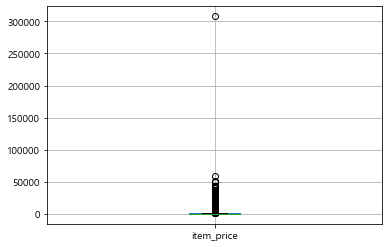

In [28]:
pd.DataFrame(df['item_price']).boxplot()

In [29]:
df[df['item_price'] > 250000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name,year,day,month,google_visited,local,population,pop_range,item_amount_day
1163157,13.12.2013,11,12,6066,307980.0,1.0,Radmin 3 - 522 лиц.,75,Интернет-магазин ЧС,Programs - For Home and Office,2013,13,12,0,online,1419007,4,307980.0


##### item_id 6066 (Radmin 3-522 persons)의 가격  307,980(약4,984,032원)
#### Radmin 3 : 원격 소프트웨어

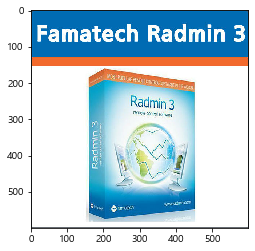

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt

file_path = tf.keras.utils.get_file('radmin3.jpg', 
                                   'https://cdn.011st.com/11dims/resize/600x600/quality/75/11src/ak/9/0/2/1/5/4/1292902154_B.jpg')
img = tf.io.read_file(file_path)
img_tensor = tf.image.decode_image(img)

plt.imshow(img_tensor) 

### item_cnt_day의 이상치 확인

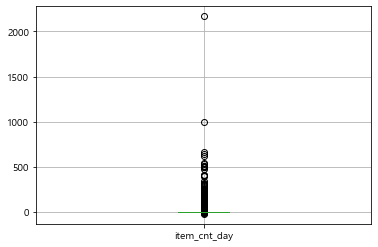

In [31]:
pd.DataFrame(df['item_cnt_day']).boxplot()

In [32]:
df[df['item_cnt_day'] > 700]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name,year,day,month,google_visited,local,population,pop_range,item_amount_day
2326924,15.01.2015,24,12,20949,4.000000,1000.0,Фирменный пакет майка 1С Интерес белый (34*42)...,71,Интернет-магазин ЧС,"Gifts - Bags, Albums, Mousepads",2015,15,1,0,online,1419007,4,4000.0
2909812,28.10.2015,33,12,11373,0.908714,2169.0,Доставка до пункта выдачи (Boxberry),9,Интернет-магазин ЧС,Delivery of goods,2015,28,10,0,online,1419007,4,1971.0


## 매장별 매출 순위<a id="2.1" />

In [33]:
shop_amount = df.groupby(['shop_id']).sum()[['item_amount_day']].sort_values('item_amount_day', ascending=False)

In [34]:
shop_amount = shop_amount.reset_index()

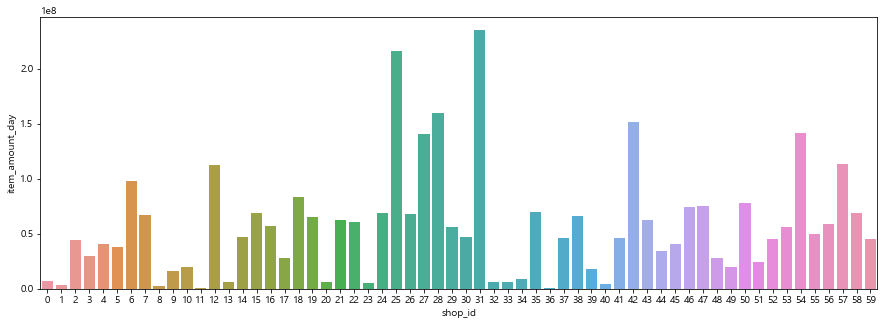

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'shop_id', y = 'item_amount_day', data=shop_amount)

## Top10 매장<a id="2.1.1" />

In [36]:
shop_amount = shop_amount.astype(int)
shop_amount.head(10)

,shop_id,item_amount_day
0,31,235217019
1,25,216479572
2,28,159746337
3,42,151916533
4,54,141939523
5,27,140632474
6,57,112999783
7,12,112205072
8,6,98067453
9,18,83392700


In [37]:
shop_amount_top10 = shop_amount[:10]

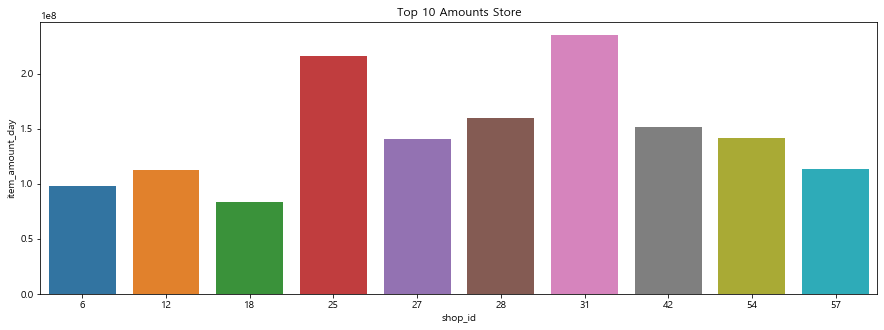

In [38]:
plt.figure(figsize=(15,5))
plt.title('Top 10 Amounts Store')
sns.barplot(x = 'shop_id', y = 'item_amount_day', data=shop_amount_top10)

## 매장별 판매량 순위<a id="2.2" />

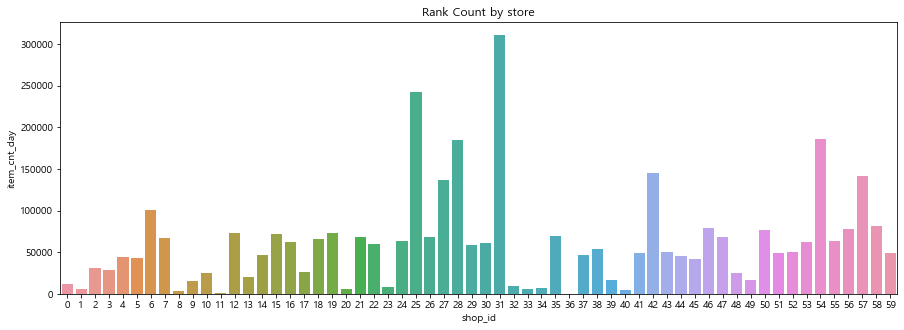

In [39]:
shop_cnt = df.groupby(['shop_id']).sum()[['item_cnt_day']].sort_values('item_cnt_day', ascending=False)
shop_cnt = shop_cnt.reset_index()
plt.figure(figsize=(15,5))
plt.title('Rank Count by store')
sns.barplot(x = 'shop_id', y = 'item_cnt_day', data=shop_cnt)

### Top10 매장<a id="2.2.1" />

In [40]:
shop_cnt.head(10)

,shop_id,item_cnt_day
0,31,310777.0
1,25,241919.0
2,54,185789.0
3,28,184557.0
4,42,144933.0
5,57,141107.0
6,27,136657.0
7,6,100489.0
8,58,81734.0
9,46,78990.0


In [41]:
shop_cnt_top10 = shop_cnt[:10]

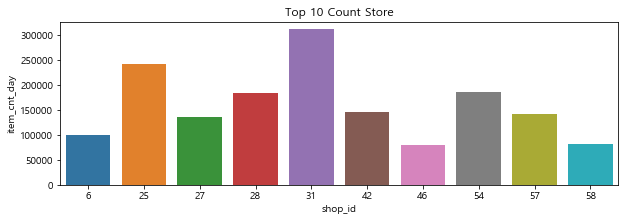

In [42]:
plt.figure(figsize=(10,3))
plt.title('Top 10 Count Store')
sns.barplot(x = 'shop_id', y = 'item_cnt_day', data=shop_cnt_top10)

## 매장별 매출 기준 Top10 아이템<a id="2.3" />

In [62]:
shop_amount_item = pd.DataFrame(df.groupby(['shop_id', 'item_category_name']).sum()['item_amount_day'])

In [63]:
shop_amount_item = shop_amount_item.reset_index()
shop_amount_item

,shop_id,item_category_name,item_amount_day
0,0,Accessories - PS2,283.0
1,0,Accessories - PS3,186567.0
2,0,Accessories - PS4,12584.0
3,0,Accessories - PSP,25606.0
4,0,Accessories - PSVita,44955.0
...,...,...,...
3266,59,Programs - Educational,675.0
3267,59,Programs - For Home and Office,1238296.0
3268,59,Service,305451.0
3269,59,Service - Tickets,42000.0


### shop id == 0 의 Top 10 item

In [64]:
shop_amount_item.loc[shop_amount_item["shop_id"] ==0].sort_values('item_amount_day', ascending=False)[0:10]

,shop_id,item_category_name,item_amount_day
20,0,Games - PS3,975108.0
22,0,Games - XBOX 360,857216.0
32,0,Movie - DVD,667843.0
15,0,Game consoles - PS3,535101.0
47,0,Programs - For Home and Office,427059.0
41,0,PC Games - Standard Editions,408575.0
18,0,Game consoles - XBOX 360,402773.0
5,0,Accessories - XBOX 360,251590.0
42,0,PSP Games,203131.0
12,0,Cinema - Blu-Ray,201098.0


In [65]:
for i in range(60):
    items_ranking = pd.DataFrame(shop_amount_item.loc[shop_amount_item["shop_id"] ==i].sort_values(by='item_amount_day', ascending=False)[0:10])
    if i == 0:
        shops_top10_items_amt = items_ranking
    else :
        concat = [shops_top10_items_amt, items_ranking]
        shops_top10_items_amt = pd.concat(concat)  

In [66]:
#pd.set_option('display.max_rows', None)
shops_top10_items_amt

,shop_id,item_category_name,item_amount_day
20,0,Games - PS3,975108.00
22,0,Games - XBOX 360,857216.00
32,0,Movie - DVD,667843.00
15,0,Game consoles - PS3,535101.00
47,0,Programs - For Home and Office,427059.00
...,...,...,...
3258,59,PC Games - Additional Editions,2514433.96
3251,59,Movie - DVD,2022247.20
3230,59,Game consoles - PS3,1527815.50
3257,59,Music - locally produced CD,1323150.23


In [67]:
for i in range(60):
    items_ranking = pd.DataFrame(shop_amount_item.loc[shop_amount_item["shop_id"] ==i].sort_values(by='item_amount_day', ascending=False)[0:3])
    if i == 0:
        shops_top3_items_amt = items_ranking
    else :
        concat = [shops_top3_items_amt, items_ranking]
        shops_top3_items_amt = pd.concat(concat)  

In [68]:
shops_top3_items_amt['item_amount_day'] = shops_top3_items_amt['item_amount_day'].astype(int)
shops_top3_items_amt

,shop_id,item_category_name,item_amount_day
20,0,Games - PS3,975108
22,0,Games - XBOX 360,857216
32,0,Movie - DVD,667843
67,1,Games - XBOX 360,431342
65,1,Games - PS3,395875
...,...,...,...
3192,58,Movie - DVD,6334508
3178,58,Games - PS3,5972363
3236,59,Games - PS3,5377052
3260,59,PC Games - Standard Editions,5213249


In [69]:
# Top1, 2, 3 따로 만들기
shops_top3_items_amt['id'] = 1
cnt = 0
for i in shops_top3_items_amt.index:
    cnt += 1
    shops_top3_items_amt['id'][i] = cnt
shops_top3_items_amt

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,shop_id,item_category_name,item_amount_day,id
20,0,Games - PS3,975108,1
22,0,Games - XBOX 360,857216,2
32,0,Movie - DVD,667843,3
67,1,Games - XBOX 360,431342,4
65,1,Games - PS3,395875,5
...,...,...,...,...
3192,58,Movie - DVD,6334508,176
3178,58,Games - PS3,5972363,177
3236,59,Games - PS3,5377052,178
3260,59,PC Games - Standard Editions,5213249,179


In [70]:
shops_top3_items_amt_top1 = pd.DataFrame(shops_top3_items_amt[shops_top3_items_amt['id'] % 3 == 1])
shops_top3_items_amt_top2 = pd.DataFrame(shops_top3_items_amt[shops_top3_items_amt['id'] % 3 == 2])
shops_top3_items_amt_top3 = pd.DataFrame(shops_top3_items_amt[shops_top3_items_amt['id'] % 3 == 0])

In [71]:
shops_top3_items_amt_top1

,shop_id,item_category_name,item_amount_day,id
20,0,Games - PS3,975108,1
67,1,Games - XBOX 360,431342,4
117,2,Games - PS4,7494654,7
172,3,Games - PS3,4331232,10
233,4,Games - PS3,4900843,13
293,5,Games - PS3,4868268,16
356,6,Games - PS4,12221056,19
415,7,Games - PS3,8754977,22
465,8,Games - PS3,370419,25
513,9,Gifts - Attributes,2804579,28


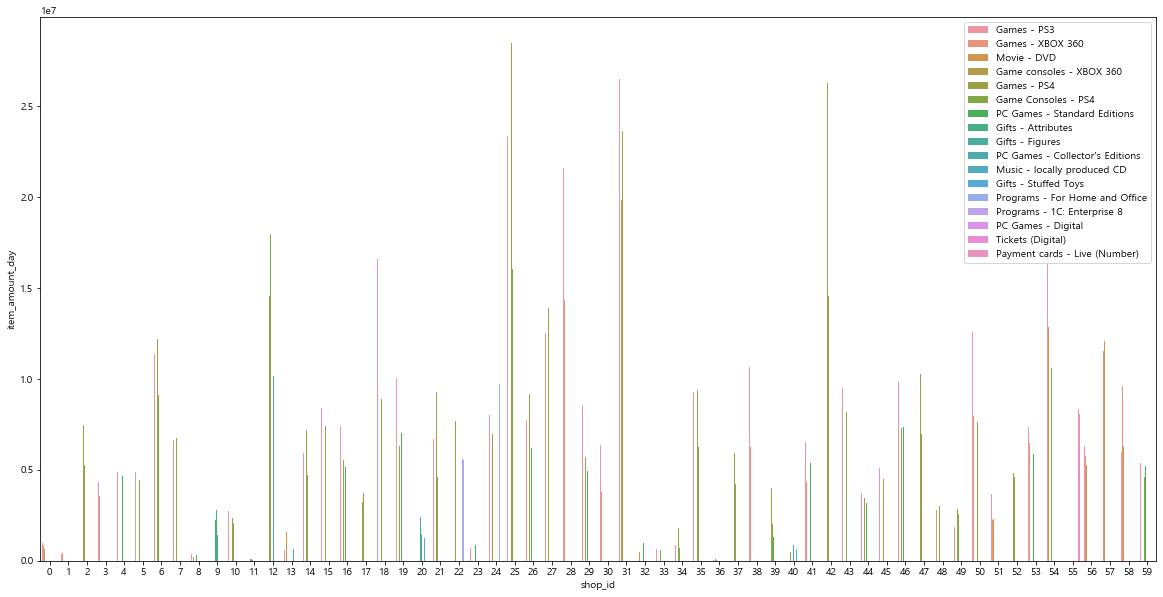

In [53]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'shop_id', y = 'item_amount_day', hue = 'item_category_name', data = shops_top3_items_amt)
plt.legend(loc='upper right')

## 매장별 매출 기준 Worst10 아이템<a id="2.4" />

In [72]:
shop_amount_item.loc[shop_amount_item["shop_id"] ==0].sort_values('item_amount_day', ascending=True)[0:10]

,shop_id,item_category_name,item_amount_day
23,0,"Gifts - Bags, Albums, Mousepads",54.0
38,0,PC - Headsets / Headphones,93.0
0,0,Accessories - PS2,283.0
36,0,Music - branded CD,2279.0
11,0,Books - Methodical materials 1C,2516.0
10,0,Books - Audiobooks 1C,2698.0
30,0,Gifts - Souvenirs (hinged),3489.0
7,0,Blank media (piece),3592.0
6,0,Batteries,4503.0
8,0,Blank media (pin),5294.0


In [73]:
for i in range(60):
    items_ranking_w = pd.DataFrame(shop_amount_item.loc[shop_amount_item["shop_id"] ==i].sort_values(by='item_amount_day', ascending=True)[0:10])
    if i == 0:
        shops_worst10_items_amt = items_ranking_w
    else :
        concat = [shops_worst10_items_amt, items_ranking_w]
        shops_worst10_items_amt = pd.concat(concat)  

In [56]:
#pd.set_option('display.max_rows', None)
shops_worst10_items_amt

,shop_id,item_category_name,item_amount_day
23,0,"Gifts - Bags, Albums, Mousepads",54.0
38,0,PC - Headsets / Headphones,93.0
0,0,Accessories - PS2,283.0
36,0,Music - branded CD,2279.0
11,0,Books - Methodical materials 1C,2516.0
...,...,...,...
3228,59,Game Consoles - Other,6480.0
3253,59,Music - MP3,6812.0
3222,59,"Books - Comics, Manga",8183.0
3254,59,Music - Music Video,9750.6


In [57]:
for i in range(60):
    items_ranking_w = pd.DataFrame(shop_amount_item.loc[shop_amount_item["shop_id"] ==i].sort_values(by='item_amount_day', ascending=True)[0:3])
    if i == 0:
        shops_worst3_items_amt = items_ranking_w
    else :
        concat = [shops_worst3_items_amt, items_ranking_w]
        shops_worst3_items_amt = pd.concat(concat)  

In [58]:
shops_worst3_items_amt

,shop_id,item_category_name,item_amount_day
23,0,"Gifts - Bags, Albums, Mousepads",54.0
38,0,PC - Headsets / Headphones,93.0
0,0,Accessories - PS2,283.0
78,1,Music - branded CD,668.0
77,1,Music - Record,983.0
...,...,...,...
3210,58,Tickets (Digital),2600.0
3194,58,Music - MP3,2638.0
3247,59,"Gifts - Postcards, Stickers",38.0
3221,59,Books - Audiobooks 1C,500.0


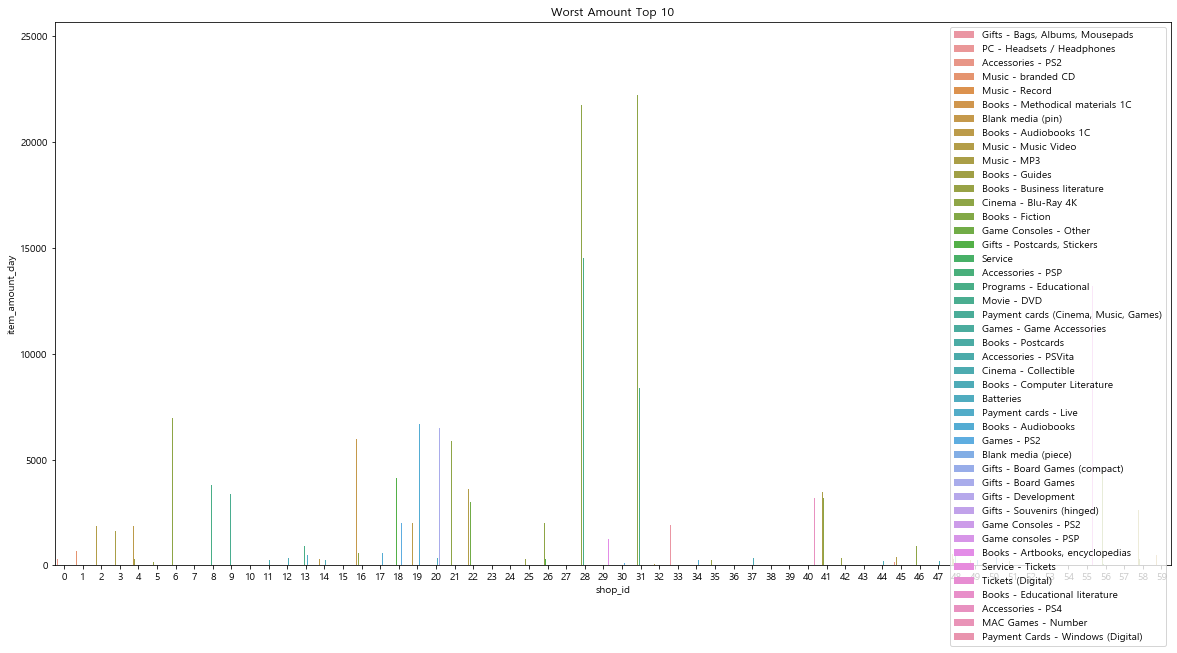

In [60]:
# Worst Amount 10
plt.figure(figsize=(20,10))
plt.title('Worst Amount Top 10')
sns.barplot(x = 'shop_id', y = 'item_amount_day', hue = 'item_category_name', data = shops_worst3_items_amt)
plt.legend(loc='upper right')

## 매장별 판매량 기준 Worst10 아이템<a id="2.5" />

In [91]:
shop_cnt_item[shop_cnt_item['shop_id'] ==0].sort_values('item_cnt_day', ascending=True)[0:10]

,shop_id,item_category_name,item_cnt_day
0,0,PC - Гарнитуры/Наушники,1.0
1,0,Аксессуары - PS2,1.0
40,0,"Подарки - Сумки, Альбомы, Коврики д/мыши",2.0
29,0,Музыка - CD фирменного производства,4.0
32,0,Музыка - Подарочные издания,11.0
27,0,Книги - Методические материалы 1С,14.0
9,0,Игровые консоли - PSVita,15.0
19,0,Карты оплаты - Live!,17.0
8,0,Игровые консоли - PSP,19.0
39,0,Подарки - Сувениры (в навеску),20.0


In [92]:
for i in range(60):
    items_ranking_w = pd.DataFrame(shop_cnt_item.loc[shop_cnt_item["shop_id"] ==i].sort_values(by='item_cnt_day', ascending=True)[0:10])
    if i == 0:
        shops_worst10_items_cnt = items_ranking_w
    else :
        concat = [shops_worst10_items_cnt, items_ranking_w]
        shops_worst10_items_cnt = pd.concat(concat)  

In [93]:
#pd.set_option('display.max_rows', None)
shops_worst10_items_cnt

,shop_id,item_category_name,item_cnt_day
0,0,PC - Гарнитуры/Наушники,1.0
1,0,Аксессуары - PS2,1.0
40,0,"Подарки - Сумки, Альбомы, Коврики д/мыши",2.0
29,0,Музыка - CD фирменного производства,4.0
32,0,Музыка - Подарочные издания,11.0
...,...,...,...
3253,59,Музыка - Подарочные издания,7.0
3244,59,Книги - Аудиокниги,12.0
3220,59,Игровые консоли - PSP,13.0
3221,59,Игровые консоли - PSVita,17.0


In [94]:
for i in range(60):
    items_ranking_w = pd.DataFrame(shop_cnt_item.loc[shop_cnt_item["shop_id"] ==i].sort_values(by='item_cnt_day', ascending=True)[0:3])
    if i == 0:
        shops_worst3_items_cnt = items_ranking_w
    else :
        concat = [shops_worst3_items_cnt, items_ranking_w]
        shops_worst3_items_cnt = pd.concat(concat)  

In [95]:
shops_worst3_items_cnt

,shop_id,item_category_name,item_cnt_day
0,0,PC - Гарнитуры/Наушники,1.0
1,0,Аксессуары - PS2,1.0
40,0,"Подарки - Сумки, Альбомы, Коврики д/мыши",2.0
74,1,Музыка - Винил,1.0
73,1,Музыка - CD фирменного производства,2.0
...,...,...,...
3193,58,Музыка - Подарочные издания,1.0
3159,58,Билеты (Цифра),2.0
3259,59,"Подарки - Открытки, наклейки",1.0
3245,59,Книги - Аудиокниги 1С,2.0


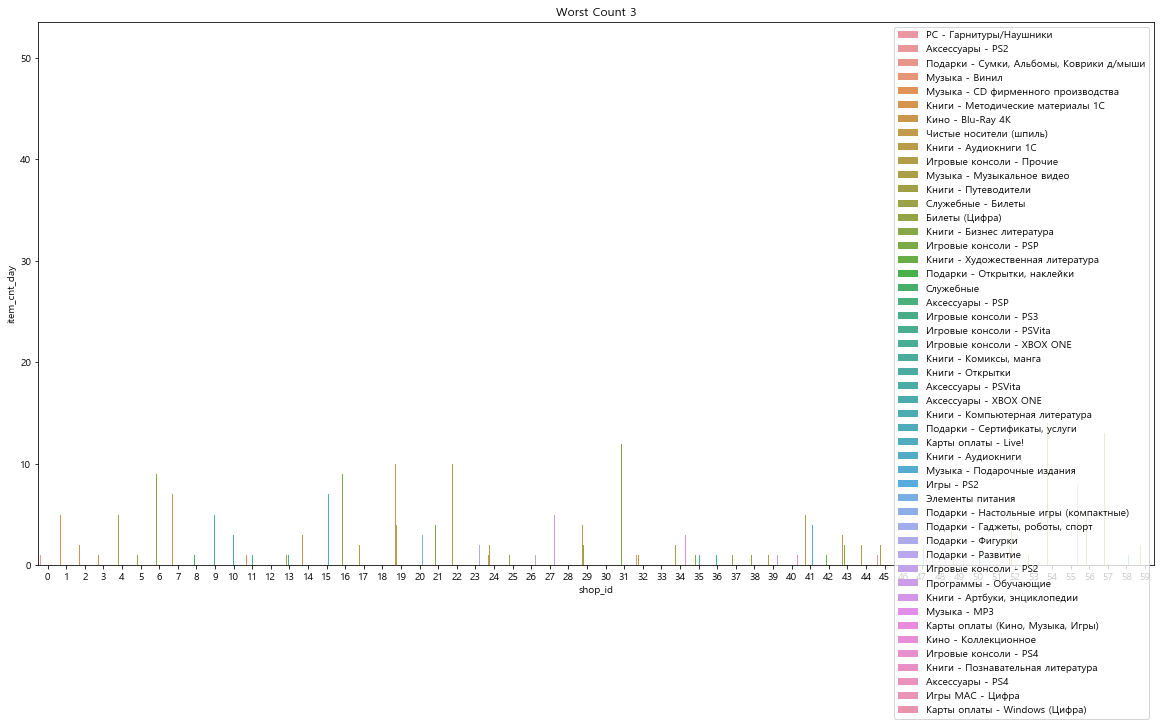

In [97]:
plt.figure(figsize=(20,10))
plt.title('Worst Count 3')
sns.barplot(x = 'shop_id', y = 'item_cnt_day', hue = 'item_category_name', data = shops_worst3_items_cnt)
plt.legend(loc='upper right')

## 아이템 매출별 순위<a id="2.6" />

In [98]:
item_ranking_amt = pd.DataFrame(df.groupby(['item_category_id','item_category_name']).sum()['item_amount_day']).sort_values(by='item_amount_day', ascending=False)

In [99]:
item_ranking_amt = item_ranking_amt.reset_index()

In [100]:
item_ranking_amt.head()

,item_category_id,item_category_name,item_amount_day
0,19,Games - PS3,4.120503e+08
1,20,Games - PS4,3.730103e+08
2,12,Game Consoles - PS4,2.922398e+08
3,23,Games - XBOX 360,2.596151e+08
4,30,PC Games - Standard Editions,2.575193e+08


In [101]:
item_ranking_amt_top10 = item_ranking_amt[0:10]
item_ranking_amt_top10

,item_category_id,item_category_name,item_amount_day
0,19,Games - PS3,4.120503e+08
1,20,Games - PS4,3.730103e+08
2,12,Game Consoles - PS4,2.922398e+08
3,23,Games - XBOX 360,2.596151e+08
4,30,PC Games - Standard Editions,2.575193e+08
5,40,Movie - DVD,1.699441e+08
6,28,PC Games - Additional Editions,1.364191e+08
7,55,Music - locally produced CD,1.000226e+08
8,37,Cinema - Blu-Ray,9.047823e+07
9,75,Programs - For Home and Office,8.708593e+07


In [102]:
item_list_amt = item_ranking_amt_top10['item_category_name']
item_list_amt = item_list_amt.to_list()
item_list_amt

['Games - PS3',
 'Games - PS4',
 'Game Consoles - PS4',
 'Games - XBOX 360',
 'PC Games - Standard Editions',
 'Movie - DVD',
 'PC Games - Additional Editions',
 'Music - locally produced CD',
 'Cinema - Blu-Ray',
 'Programs - For Home and Office']

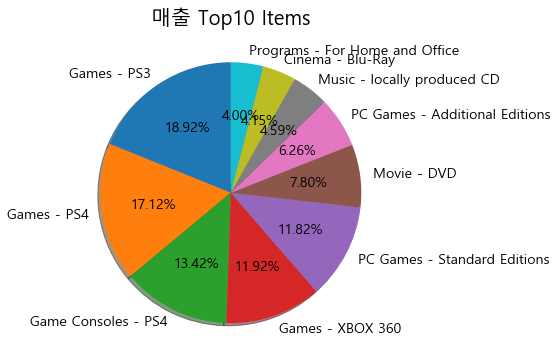

In [103]:
plt.figure(figsize=(7,6))
plt.pie(item_ranking_amt_top10['item_amount_day'],
        labels=item_list_amt,
        autopct='%1.2f%%', 
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) 
plt.title('매출 Top10 Items', fontsize=20)
plt.show()

## 아이템 판매량 순위<a id="2.7" />

In [104]:
item_ranking_cnt = pd.DataFrame(df.groupby(['item_category_id','item_category_name']).sum()['item_cnt_day']).sort_values(by='item_cnt_day', ascending=False)

item_ranking_cnt = item_ranking_cnt.reset_index()

item_ranking_cnt.head()

,item_category_id,item_category_name,item_cnt_day
0,40,Movie - DVD,634170.0
1,30,PC Games - Standard Editions,456540.0
2,55,Music - locally produced CD,348591.0
3,19,Games - PS3,254887.0
4,37,Cinema - Blu-Ray,203283.0


In [105]:
item_ranking_cnt_top10 = item_ranking_cnt[0:10]

item_ranking_cnt_top10

,item_category_id,item_category_name,item_cnt_day
0,40,Movie - DVD,634170.0
1,30,PC Games - Standard Editions,456540.0
2,55,Music - locally produced CD,348591.0
3,19,Games - PS3,254887.0
4,37,Cinema - Blu-Ray,203283.0
5,71,"Gifts - Bags, Albums, Mousepads",187998.0
6,28,PC Games - Additional Editions,174954.0
7,23,Games - XBOX 360,169940.0
8,20,Games - PS4,127319.0
9,65,Gifts - Board Games (compact),73077.0


In [106]:
item_list_cnt = item_ranking_cnt_top10['item_category_name']
item_list_cnt = item_list_cnt.to_list()
item_list_cnt

['Movie - DVD',
 'PC Games - Standard Editions',
 'Music - locally produced CD',
 'Games - PS3',
 'Cinema - Blu-Ray',
 'Gifts - Bags, Albums, Mousepads',
 'PC Games - Additional Editions',
 'Games - XBOX 360',
 'Games - PS4',
 'Gifts - Board Games (compact)']

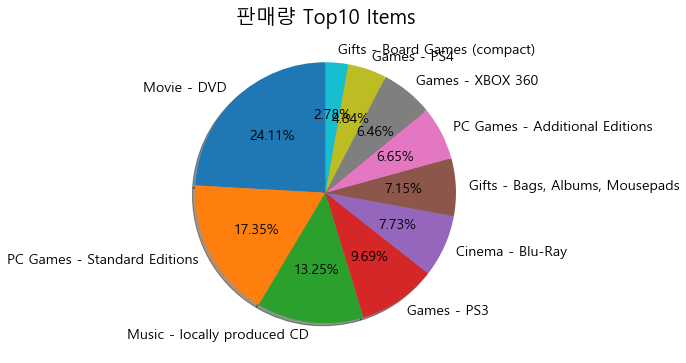

In [107]:
plt.figure(figsize=(7,6))
plt.pie(item_ranking_cnt_top10['item_cnt_day'],
        labels=item_list_cnt,
        autopct='%1.2f%%', 
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) 
plt.title('판매량 Top10 Items', fontsize=20)
plt.show()

# 연도별 아이템 매출 순위<a id="2.8" />
## 2013년

In [108]:
item_ranking_amt_2013 = pd.DataFrame(df[df['year']==2013].groupby(['item_category_id','item_category_name']).sum()['item_amount_day']).sort_values(by='item_amount_day', ascending=False)

In [109]:
item_ranking_amt_2013 = item_ranking_amt_2013.reset_index()
item_ranking_amt_2013.head()

,item_category_id,item_category_name,item_amount_day
0,19,Games - PS3,2.264473e+08
1,30,PC Games - Standard Editions,1.207048e+08
2,23,Games - XBOX 360,1.147954e+08
3,40,Movie - DVD,8.699989e+07
4,12,Game Consoles - PS4,7.860946e+07


In [110]:
item_ranking_amt_top10_2013 = item_ranking_amt_2013[0:10]
item_ranking_amt_top10_2013

,item_category_id,item_category_name,item_amount_day
0,19,Games - PS3,2.264473e+08
1,30,PC Games - Standard Editions,1.207048e+08
2,23,Games - XBOX 360,1.147954e+08
3,40,Movie - DVD,8.699989e+07
4,12,Game Consoles - PS4,7.860946e+07
5,28,PC Games - Additional Editions,5.560507e+07
6,11,Game consoles - PS3,4.896319e+07
7,55,Music - locally produced CD,4.246477e+07
8,75,Programs - For Home and Office,4.175172e+07
9,37,Cinema - Blu-Ray,3.933081e+07


In [111]:
item_list_amt_2013 = item_ranking_amt_top10_2013['item_category_name']
item_list_amt_2013 = item_list_amt_2013.to_list()
item_list_amt_2013

['Games - PS3',
 'PC Games - Standard Editions',
 'Games - XBOX 360',
 'Movie - DVD',
 'Game Consoles - PS4',
 'PC Games - Additional Editions',
 'Game consoles - PS3',
 'Music - locally produced CD',
 'Programs - For Home and Office',
 'Cinema - Blu-Ray']

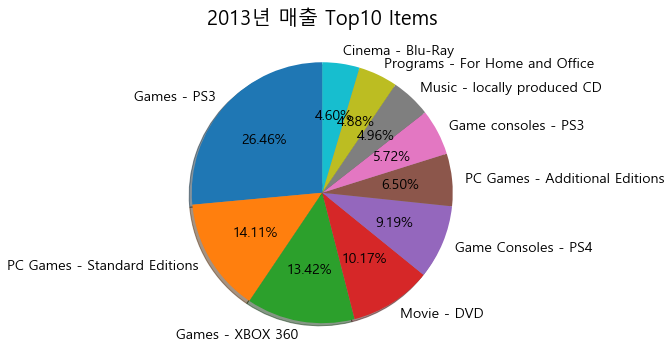

In [112]:
plt.figure(figsize=(7,6))
plt.pie(item_ranking_amt_top10_2013['item_amount_day'],
        labels=item_list_amt_2013,
        autopct='%1.2f%%', 
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) 
plt.title('2013년 매출 Top10 Items', fontsize=20)
plt.show()

## 2014년

In [113]:
item_ranking_amt_2014 = pd.DataFrame(df[df['year']==2014].groupby(['item_category_id','item_category_name']).sum()['item_amount_day']).sort_values(by='item_amount_day', ascending=False)
item_ranking_amt_2014 = item_ranking_amt_2014.reset_index()
item_ranking_amt_2014.head()

,item_category_id,item_category_name,item_amount_day
0,20,Games - PS4,1.816473e+08
1,12,Game Consoles - PS4,1.648212e+08
2,19,Games - PS3,1.298432e+08
3,23,Games - XBOX 360,9.805439e+07
4,30,PC Games - Standard Editions,8.080602e+07


In [114]:
item_ranking_amt_top10_2014 = item_ranking_amt_2014[0:10]
item_ranking_amt_top10_2014

,item_category_id,item_category_name,item_amount_day
0,20,Games - PS4,1.816473e+08
1,12,Game Consoles - PS4,1.648212e+08
2,19,Games - PS3,1.298432e+08
3,23,Games - XBOX 360,9.805439e+07
4,30,PC Games - Standard Editions,8.080602e+07
5,40,Movie - DVD,5.452513e+07
6,28,PC Games - Additional Editions,5.387862e+07
7,55,Music - locally produced CD,3.621316e+07
8,16,Game consoles - XBOX ONE,3.336392e+07
9,3,Accessories - PS4,3.259830e+07


In [115]:
item_list_amt_2014 = item_ranking_amt_top10_2014['item_category_name']

In [116]:
item_list_amt_2014 = item_list_amt_2014.to_list()
item_list_amt_2014

['Games - PS4',
 'Game Consoles - PS4',
 'Games - PS3',
 'Games - XBOX 360',
 'PC Games - Standard Editions',
 'Movie - DVD',
 'PC Games - Additional Editions',
 'Music - locally produced CD',
 'Game consoles - XBOX ONE',
 'Accessories - PS4']

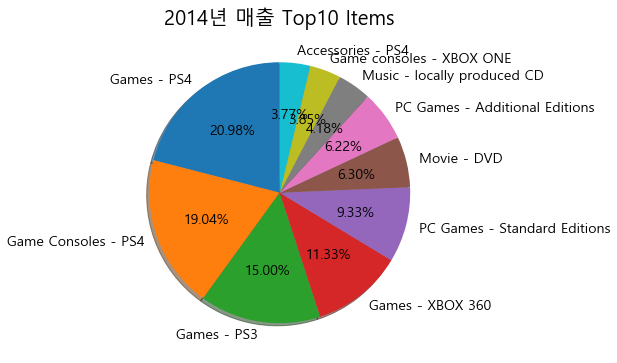

In [117]:
plt.figure(figsize=(7,6))
plt.pie(item_ranking_amt_top10_2014['item_amount_day'],
        labels=item_list_amt_2014,
        autopct='%1.2f%%', 
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) 
plt.title('2014년 매출 Top10 Items', fontsize=20)
plt.show()

## 2015년

In [118]:
item_ranking_amt_2015 = pd.DataFrame(df[df['year']==2015].groupby(['item_category_id','item_category_name']).sum()['item_amount_day']).sort_values(by='item_amount_day', ascending=False)
item_ranking_amt_2015 = item_ranking_amt_2015.reset_index()
item_ranking_amt_2015.head()

,item_category_id,item_category_name,item_amount_day
0,20,Games - PS4,1.738580e+08
1,30,PC Games - Standard Editions,5.600849e+07
2,19,Games - PS3,5.575984e+07
3,12,Game Consoles - PS4,4.880914e+07
4,23,Games - XBOX 360,4.676531e+07


In [119]:
item_ranking_amt_top10_2015 = item_ranking_amt_2015[0:10]
item_ranking_amt_top10_2015

,item_category_id,item_category_name,item_amount_day
0,20,Games - PS4,1.738580e+08
1,30,PC Games - Standard Editions,5.600849e+07
2,19,Games - PS3,5.575984e+07
3,12,Game Consoles - PS4,4.880914e+07
4,23,Games - XBOX 360,4.676531e+07
5,40,Movie - DVD,2.841906e+07
6,24,Games - XBOX ONE,2.747167e+07
7,28,PC Games - Additional Editions,2.693546e+07
8,72,Gifts - Figures,2.405497e+07
9,55,Music - locally produced CD,2.134463e+07


In [120]:
item_list_amt_2015 = item_ranking_amt_top10_2015['item_category_name']

In [121]:
item_list_amt_2015 = item_list_amt_2015.to_list()
item_list_amt_2015

['Games - PS4',
 'PC Games - Standard Editions',
 'Games - PS3',
 'Game Consoles - PS4',
 'Games - XBOX 360',
 'Movie - DVD',
 ' Games - XBOX ONE ',
 'PC Games - Additional Editions',
 'Gifts - Figures',
 'Music - locally produced CD']

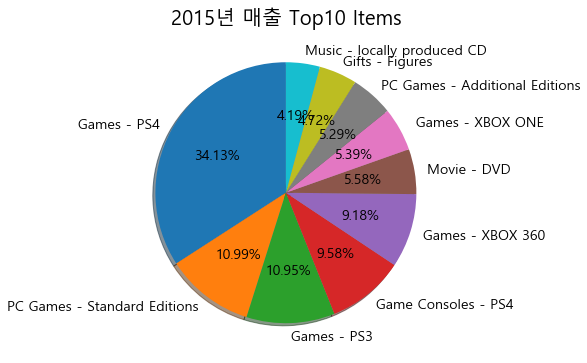

In [122]:
plt.figure(figsize=(7,6))
plt.pie(item_ranking_amt_top10_2015['item_amount_day'],
        labels=item_list_amt_2015,
        autopct='%1.2f%%', 
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) 
plt.title('2015년 매출 Top10 Items', fontsize=20)
plt.show()

## 매출 Top7의 추세<a id="2.8.1" />

In [123]:
item_ranking_amt_top10_2013 = item_ranking_amt_top10_2013.rename(columns={'item_amount_day':'item_amount_13'})

In [124]:
item_ranking_amt_top10_2014 = item_ranking_amt_top10_2014.rename(columns={'item_amount_day':'item_amount_14'})

In [125]:
item_ranking_amt_top10_2015 = item_ranking_amt_top10_2015.rename(columns={'item_amount_day':'item_amount_15'})

In [126]:
item_ranking_amt_top_total = pd.merge(item_ranking_amt_top10_2013, item_ranking_amt_top10_2014)

In [127]:
item_ranking_amt_top_total = pd.merge(item_ranking_amt_top_total, item_ranking_amt_top10_2015)

In [138]:
item_ranking_amt_top_total['item_amount_13'] = item_ranking_amt_top_total['item_amount_13'] .astype(int)
item_ranking_amt_top_total['item_amount_14'] = item_ranking_amt_top_total['item_amount_14'] .astype(int)
item_ranking_amt_top_total['item_amount_15'] = item_ranking_amt_top_total['item_amount_15'] .astype(int)
item_ranking_amt_top_total

,item_category_id,item_category_name,item_amount_13,item_amount_14,item_amount_15
0,19,Games - PS3,226447288,129843155,55759836
1,30,PC Games - Standard Editions,120704785,80806020,56008485
2,23,Games - XBOX 360,114795425,98054393,46765313
3,40,Movie - DVD,86999891,54525125,28419055
4,12,Game Consoles - PS4,78609457,164821167,48809137
5,28,PC Games - Additional Editions,55605065,53878622,26935460
6,55,Music - locally produced CD,42464767,36213164,21344631


In [139]:
item_amount_13 = item_ranking_amt_top_total[['item_category_id','item_category_name','item_amount_13']]

In [140]:
item_amount_14 = item_ranking_amt_top_total[['item_category_id','item_category_name','item_amount_14']]

In [141]:
item_amount_15 = item_ranking_amt_top_total[['item_category_id','item_category_name','item_amount_15']]

In [142]:
item_amount_15

,item_category_id,item_category_name,item_amount_15
0,19,Games - PS3,55759836
1,30,PC Games - Standard Editions,56008485
2,23,Games - XBOX 360,46765313
3,40,Movie - DVD,28419055
4,12,Game Consoles - PS4,48809137
5,28,PC Games - Additional Editions,26935460
6,55,Music - locally produced CD,21344631


In [143]:
item_amount_13 = item_amount_13.rename(columns={'item_amount_13':'item_amount'})
item_amount_14 = item_amount_14.rename(columns={'item_amount_14':'item_amount'})
item_amount_15 = item_amount_15.rename(columns={'item_amount_15':'item_amount'})

In [144]:
item_amount_15

,item_category_id,item_category_name,item_amount
0,19,Games - PS3,55759836
1,30,PC Games - Standard Editions,56008485
2,23,Games - XBOX 360,46765313
3,40,Movie - DVD,28419055
4,12,Game Consoles - PS4,48809137
5,28,PC Games - Additional Editions,26935460
6,55,Music - locally produced CD,21344631


In [145]:
item_amount_13_14 = pd.concat([item_amount_13, item_amount_14])
item_amount_13_14_15 = pd.concat([item_amount_13_14, item_amount_15])
item_amount_13_14_15

,item_category_id,item_category_name,item_amount
0,19,Games - PS3,226447288
1,30,PC Games - Standard Editions,120704785
2,23,Games - XBOX 360,114795425
3,40,Movie - DVD,86999891
4,12,Game Consoles - PS4,78609457
5,28,PC Games - Additional Editions,55605065
6,55,Music - locally produced CD,42464767
0,19,Games - PS3,129843155
1,30,PC Games - Standard Editions,80806020
2,23,Games - XBOX 360,98054393


In [146]:
item_amount_13_14_15['year'] = [13,13,13,13,13,13,13,14,14,14,14,14,14,14,15,15,15,15,15,15,15]
item_amount_13_14_15

,item_category_id,item_category_name,item_amount,year
0,19,Games - PS3,226447288,13
1,30,PC Games - Standard Editions,120704785,13
2,23,Games - XBOX 360,114795425,13
3,40,Movie - DVD,86999891,13
4,12,Game Consoles - PS4,78609457,13
5,28,PC Games - Additional Editions,55605065,13
6,55,Music - locally produced CD,42464767,13
0,19,Games - PS3,129843155,14
1,30,PC Games - Standard Editions,80806020,14
2,23,Games - XBOX 360,98054393,14


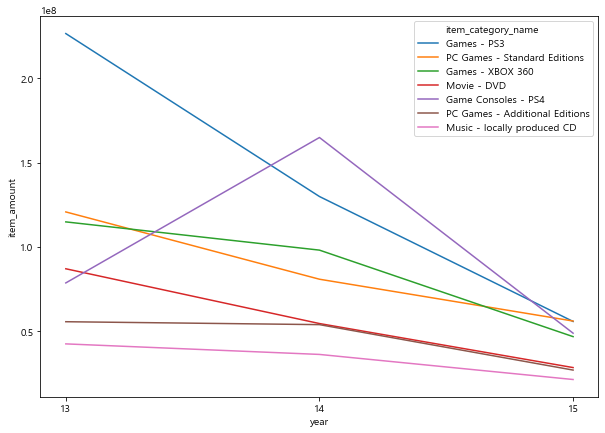

In [147]:
plt.figure(figsize=(10,7))
plt.xticks([13,14,15])
sns.lineplot(x="year", y="item_amount",hue="item_category_name",data=item_amount_13_14_15)

# 연도별 아이템 판매량 순위<a id="2.9" />
## 2013

In [148]:
item_ranking_cnt_2013 = pd.DataFrame(df[df['year']==2013].groupby(['item_category_id','item_category_name']).sum()['item_cnt_day']).sort_values(by='item_cnt_day', ascending=False)

In [149]:
item_ranking_cnt_2013 = item_ranking_cnt_2013.reset_index()
item_ranking_cnt_2013.head()

,item_category_id,item_category_name,item_cnt_day
0,40,Movie - DVD,330889.0
1,30,PC Games - Standard Editions,235213.0
2,55,Music - locally produced CD,154935.0
3,19,Games - PS3,134425.0
4,37,Cinema - Blu-Ray,86526.0


In [150]:
item_ranking_cnt_top10_2013 = item_ranking_cnt_2013[0:10]
item_ranking_cnt_top10_2013

,item_category_id,item_category_name,item_cnt_day
0,40,Movie - DVD,330889.0
1,30,PC Games - Standard Editions,235213.0
2,55,Music - locally produced CD,154935.0
3,19,Games - PS3,134425.0
4,37,Cinema - Blu-Ray,86526.0
5,28,PC Games - Additional Editions,77173.0
6,23,Games - XBOX 360,69997.0
7,71,"Gifts - Bags, Albums, Mousepads",63928.0
8,65,Gifts - Board Games (compact),25302.0
9,75,Programs - For Home and Office,24222.0


In [151]:
item_list_cnt_2013 = item_ranking_cnt_top10_2013['item_category_name']
item_list_cnt_2013 = item_list_cnt_2013.to_list()
item_list_cnt_2013

['Movie - DVD',
 'PC Games - Standard Editions',
 'Music - locally produced CD',
 'Games - PS3',
 'Cinema - Blu-Ray',
 'PC Games - Additional Editions',
 'Games - XBOX 360',
 'Gifts - Bags, Albums, Mousepads',
 'Gifts - Board Games (compact)',
 'Programs - For Home and Office']

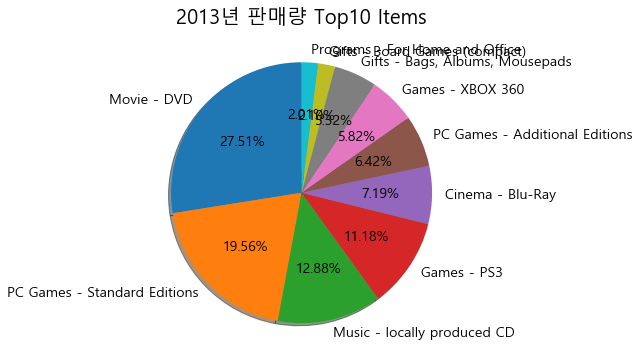

In [152]:
plt.figure(figsize=(7,6))
plt.pie(item_ranking_cnt_top10_2013['item_cnt_day'],
        labels=item_list_cnt_2013,
        autopct='%1.2f%%', 
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) 
plt.title('2013년 판매량 Top10 Items', fontsize=20)
plt.show()

## 2014년

In [153]:
item_ranking_cnt_2014 = pd.DataFrame(df[df['year']==2014].groupby(['item_category_id','item_category_name']).sum()['item_cnt_day']).sort_values(by='item_cnt_day', ascending=False)
item_ranking_cnt_2014 = item_ranking_cnt_2014.reset_index()
item_ranking_cnt_2014.head()

,item_category_id,item_category_name,item_cnt_day
0,40,Movie - DVD,201538.0
1,30,PC Games - Standard Editions,146457.0
2,55,Music - locally produced CD,124699.0
3,71,"Gifts - Bags, Albums, Mousepads",85288.0
4,19,Games - PS3,82198.0


In [154]:
item_ranking_cnt_top10_2014 = item_ranking_cnt_2014[0:10]
item_ranking_cnt_top10_2014

,item_category_id,item_category_name,item_cnt_day
0,40,Movie - DVD,201538.0
1,30,PC Games - Standard Editions,146457.0
2,55,Music - locally produced CD,124699.0
3,71,"Gifts - Bags, Albums, Mousepads",85288.0
4,19,Games - PS3,82198.0
5,37,Cinema - Blu-Ray,75372.0
6,28,PC Games - Additional Editions,70224.0
7,23,Games - XBOX 360,66876.0
8,20,Games - PS4,66601.0
9,65,Gifts - Board Games (compact),27762.0


In [155]:
item_list_cnt_2014 = item_ranking_cnt_top10_2014['item_category_name']
item_list_cnt_2014 = item_list_cnt_2014.to_list()
item_list_cnt_2014

['Movie - DVD',
 'PC Games - Standard Editions',
 'Music - locally produced CD',
 'Gifts - Bags, Albums, Mousepads',
 'Games - PS3',
 'Cinema - Blu-Ray',
 'PC Games - Additional Editions',
 'Games - XBOX 360',
 'Games - PS4',
 'Gifts - Board Games (compact)']

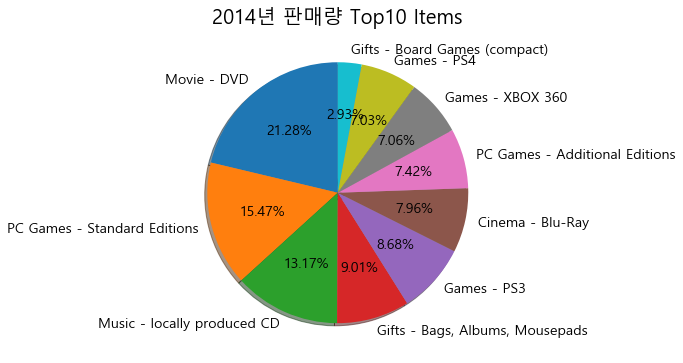

In [156]:
plt.figure(figsize=(7,6))
plt.pie(item_ranking_cnt_top10_2014['item_cnt_day'],
        labels=item_list_cnt_2014,
        autopct='%1.2f%%', 
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) 
plt.title('2014년 판매량 Top10 Items', fontsize=20)
plt.show()

## 2015년

In [157]:
item_ranking_cnt_2015 = pd.DataFrame(df[df['year']==2015].groupby(['item_category_id','item_category_name']).sum()['item_cnt_day']).sort_values(by='item_cnt_day', ascending=False)
item_ranking_cnt_2015 = item_ranking_cnt_2015.reset_index()
item_ranking_cnt_2015.head()

,item_category_id,item_category_name,item_cnt_day
0,40,Movie - DVD,101743.0
1,30,PC Games - Standard Editions,74870.0
2,55,Music - locally produced CD,68957.0
3,20,Games - PS4,54225.0
4,37,Cinema - Blu-Ray,41385.0


In [158]:
item_ranking_cnt_top10_2015 = item_ranking_cnt_2015[0:10]
item_ranking_cnt_top10_2015

,item_category_id,item_category_name,item_cnt_day
0,40,Movie - DVD,101743.0
1,30,PC Games - Standard Editions,74870.0
2,55,Music - locally produced CD,68957.0
3,20,Games - PS4,54225.0
4,37,Cinema - Blu-Ray,41385.0
5,71,"Gifts - Bags, Albums, Mousepads",38782.0
6,19,Games - PS3,38264.0
7,23,Games - XBOX 360,33067.0
8,28,PC Games - Additional Editions,27557.0
9,65,Gifts - Board Games (compact),20013.0


In [159]:
item_list_cnt_2015 = item_ranking_cnt_top10_2015['item_category_name']
item_list_cnt_2015 = item_list_cnt_2015.to_list()
item_list_cnt_2015

['Movie - DVD',
 'PC Games - Standard Editions',
 'Music - locally produced CD',
 'Games - PS4',
 'Cinema - Blu-Ray',
 'Gifts - Bags, Albums, Mousepads',
 'Games - PS3',
 'Games - XBOX 360',
 'PC Games - Additional Editions',
 'Gifts - Board Games (compact)']

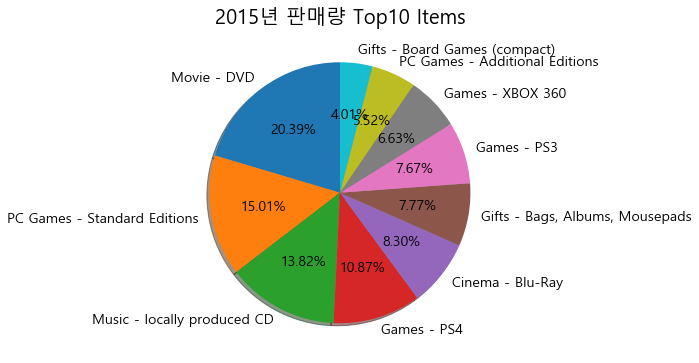

In [160]:
plt.figure(figsize=(7,6))
plt.pie(item_ranking_cnt_top10_2015['item_cnt_day'],
        labels=item_list_cnt_2015,
        autopct='%1.2f%%', 
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 14}) 
plt.title('2015년 판매량 Top10 Items', fontsize=20)
plt.show()

## 판매량 Top9의 추세<a id="2.9.1" />

In [161]:
item_ranking_cnt_top10_2013 = item_ranking_cnt_top10_2013.rename(columns={'item_cnt_day':'item_cnt_13'})
item_ranking_cnt_top10_2014 = item_ranking_cnt_top10_2014.rename(columns={'item_cnt_day':'item_cnt_14'})
item_ranking_cnt_top10_2015 = item_ranking_cnt_top10_2015.rename(columns={'item_cnt_day':'item_cnt_15'})

In [162]:
item_ranking_cnt_top_total = pd.merge(item_ranking_cnt_top10_2013, item_ranking_cnt_top10_2014)
item_ranking_cnt_top_total = pd.merge(item_ranking_cnt_top_total, item_ranking_cnt_top10_2015)
item_ranking_cnt_top_total

,item_category_id,item_category_name,item_cnt_13,item_cnt_14,item_cnt_15
0,40,Movie - DVD,330889.0,201538.0,101743.0
1,30,PC Games - Standard Editions,235213.0,146457.0,74870.0
2,55,Music - locally produced CD,154935.0,124699.0,68957.0
3,19,Games - PS3,134425.0,82198.0,38264.0
4,37,Cinema - Blu-Ray,86526.0,75372.0,41385.0
5,28,PC Games - Additional Editions,77173.0,70224.0,27557.0
6,23,Games - XBOX 360,69997.0,66876.0,33067.0
7,71,"Gifts - Bags, Albums, Mousepads",63928.0,85288.0,38782.0
8,65,Gifts - Board Games (compact),25302.0,27762.0,20013.0


In [163]:
item_cnt_13 = item_ranking_cnt_top_total[['item_category_id','item_category_name','item_cnt_13']]
item_cnt_14 = item_ranking_cnt_top_total[['item_category_id','item_category_name','item_cnt_14']]
item_cnt_15 = item_ranking_cnt_top_total[['item_category_id','item_category_name','item_cnt_15']]

In [164]:
item_cnt_14

,item_category_id,item_category_name,item_cnt_14
0,40,Movie - DVD,201538.0
1,30,PC Games - Standard Editions,146457.0
2,55,Music - locally produced CD,124699.0
3,19,Games - PS3,82198.0
4,37,Cinema - Blu-Ray,75372.0
5,28,PC Games - Additional Editions,70224.0
6,23,Games - XBOX 360,66876.0
7,71,"Gifts - Bags, Albums, Mousepads",85288.0
8,65,Gifts - Board Games (compact),27762.0


In [165]:
item_cnt_13 = item_cnt_13.rename(columns={'item_cnt_13':'item_cnt'})
item_cnt_14 = item_cnt_14.rename(columns={'item_cnt_14':'item_cnt'})
item_cnt_15 = item_cnt_15.rename(columns={'item_cnt_15':'item_cnt'})

In [166]:
item_cnt_13_14 = pd.concat([item_cnt_13, item_cnt_14])
item_cnt_13_14_15 = pd.concat([item_cnt_13_14, item_cnt_15])
item_cnt_13_14_15

,item_category_id,item_category_name,item_cnt
0,40,Movie - DVD,330889.0
1,30,PC Games - Standard Editions,235213.0
2,55,Music - locally produced CD,154935.0
3,19,Games - PS3,134425.0
4,37,Cinema - Blu-Ray,86526.0
5,28,PC Games - Additional Editions,77173.0
6,23,Games - XBOX 360,69997.0
7,71,"Gifts - Bags, Albums, Mousepads",63928.0
8,65,Gifts - Board Games (compact),25302.0
0,40,Movie - DVD,201538.0


In [167]:
item_cnt_13_14_15['year'] = [13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15] 
item_cnt_13_14_15[:20]

,item_category_id,item_category_name,item_cnt,year
0,40,Movie - DVD,330889.0,13
1,30,PC Games - Standard Editions,235213.0,13
2,55,Music - locally produced CD,154935.0,13
3,19,Games - PS3,134425.0,13
4,37,Cinema - Blu-Ray,86526.0,13
5,28,PC Games - Additional Editions,77173.0,13
6,23,Games - XBOX 360,69997.0,13
7,71,"Gifts - Bags, Albums, Mousepads",63928.0,13
8,65,Gifts - Board Games (compact),25302.0,13
0,40,Movie - DVD,201538.0,14


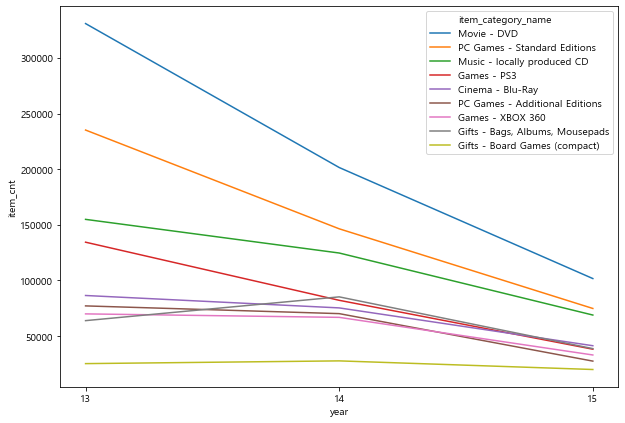

In [168]:
plt.figure(figsize=(10,7))
plt.xticks([13,14,15])
sns.lineplot(x="year", y="item_cnt",hue="item_category_name",data=item_cnt_13_14_15)

## 월별 총매출 추이<a id="2.9.2" />

In [169]:
amount_flow = pd.DataFrame(df.groupby('date_block_num').sum()['item_amount_day'])

In [170]:
amount_flow = amount_flow.reset_index()

In [171]:
amount_flow.head()

,date_block_num,item_amount_day
0,0,9.194694e+07
1,1,9.066571e+07
2,2,1.049327e+08
3,3,6.915429e+07
4,4,6.506531e+07


In [172]:
DBN = amount_flow['date_block_num']
DBN = DBN.values

Text(0, 0.5, 'Monthly Amount')

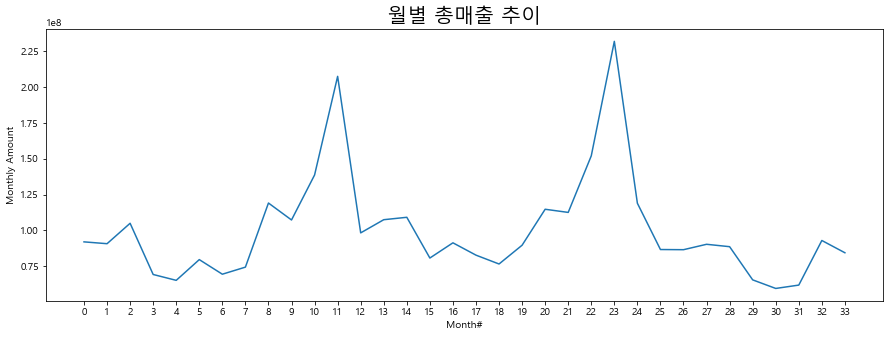

In [173]:
plt.figure(figsize=(15,5))
plt.plot(amount_flow.date_block_num, 
         amount_flow.item_amount_day)
plt.title('월별 총매출 추이', fontsize=20)
plt.xticks(DBN)
plt.xlabel('Month#')
plt.ylabel('Monthly Amount')

## 월별 총판매량 추이<a id="2.9.3" />

In [174]:
cnt_flow = pd.DataFrame(df.groupby('date_block_num').sum()['item_cnt_day'])

In [175]:
cnt_flow = cnt_flow.reset_index()

In [176]:
#['13-1', '13-2', '13-3', '13-4', '13-5', '13-6', '13-7', '13-8', '13-9', '13-10', '13-11', '13-12', '14-1', '14-2', '14-3', '14-4', '14-5', '14-6', '14-7', '14-8', '14-9', '14-10', '14-11', '14-12', '15-1', '15-2', '15-3', '15-4', '15-5', '15-6', '15-7', '15-8', '15-9', '15-10']

Text(0, 0.5, "Monthly Q'ty")

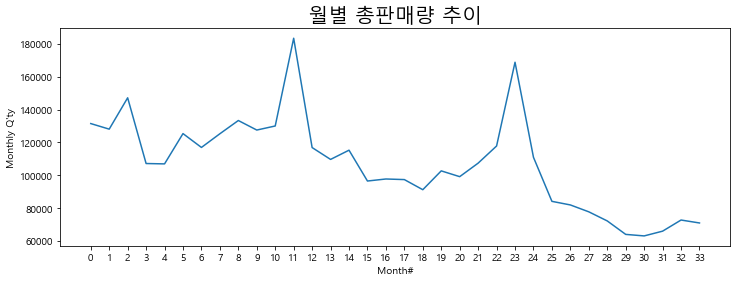

In [177]:
plt.figure(figsize=(12,4))
plt.plot(cnt_flow.date_block_num, 
         cnt_flow.item_cnt_day)
plt.title('월별 총판매량 추이', fontsize=20)
plt.xticks(DBN)
plt.xlabel('Month#')
plt.ylabel("Monthly Q'ty")

## 매장 시각화<a id="2.9.4">

In [183]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [184]:
import folium
from folium.plugins import MarkerCluster

In [185]:
NE = pd.read_csv('using_data/doo/folium_dataframe.csv')

In [186]:
NE.head()

,Unnamed: 0,shop_id,N,E,local
0,0,0,62.025173,129.720232,Yakutsk
1,1,1,62.031050,129.738358,Yakutsk
2,2,2,45.012745,38.930380,Adygeya
3,3,3,55.797801,37.938447,Moskva
4,4,4,48.771953,44.799820,Volzhsky


In [190]:
m = folium.Map((55.797801,37.938447),zoom_start=4)
mc = MarkerCluster()

for i in range(len(NE)):
    mc.add_child( folium.Marker(location=[NE["N"][i],NE["E"][i]],popup=NE['shop_id'][i],icon=folium.Icon(color='red',icon='star') ) )
    m.add_child(mc)

In [191]:
m

# 3. Data Preprocessing<a id= "3" />

###게임 관련 item 목록
- ['2015_1'] 5917 = Prototype 2 게임. 판매량이 들쑥날쑥함.(직전 달에 500개 판매)
-  ['2013_3'] 6738 = 스타크래프트2, 2013년 3월 12일에 '스타2:군단의심장' 출시.
- ['2015_3'] 1875 = Battlefield Hardline [PC] 2015.3.17 출시.
- ['2015_4'] 3730 = Grand Theft Auto V (Digital) 출시
- ['2015_4'] 3731 = Grand Theft Auto V (러시아자막) 출시
- ['2015_5'] 10209 = The Witcher 3: Wild Hunt, 2015.5.19 출시
- @['2013_6'] 2808 = 디아블로3 (확장판인 것 같음. 초판은 12년 5월 15일 출시) -> 매달 1, 2개씩 꾸준히 팔림
- ['2013_8'] 1516 = 어쌔신크리드 IV. 2013년 10월 29일 출시?
- @['2013_9'] 3732 = GTA5, 2013년 9월 17일에 출시 -> 4달간 꽤 팔리다가 이후 0~11개 사이로 팔림(2015년 10월에 0개)
- ['2014_9'] 6502 = sims4 리미티드 에디션
- ['2014_10'] 19437 = Middle-earth: Shadow of Mordor
- ['2014_11'] 3025 = 드래곤 에이지 인퀴지션 2014.11.18 출시 (이전에 판매된 것은 이전 버전인지 잘 모르겠음)


*나머지 카테고리
- ['2013_4'] 21376 = 호빗DVD. 출시 이후 안 팔림,,
- ['2014_4'] 8057 = Payment cards (Cinema, Music, Games)
- ['2014_9'] 9241, 9242, 9243 = 10월 세계 게임 박람회 IgroMir 티켓
- ['2015_9'] 9244, 9245, 9246, 9247, 9248, 9249, 9250, 9251, 9252, 9253, 9254, 9255  = 10월 세계 게임 박람회 IgroMir 티켓


test data에 포함된 item_id
- ['2013_3'] 6738 = 스타크래프트2, 2013년 3월 12일에 '스타2:군단의심장' 출시. -> 0
- ['2015_4'] 3731 = Grand Theft Auto V (러시아자막) 출시 -> 0
- ['2015_5'] 10209 = The Witcher 3: Wild Hunt, 2015.5.19 출시 -> 0
- @['2013_6'] 2808 = 디아블로3 (확장판인 것 같음. 초판은 12년 5월 15일 출시) -> 매달 1, 2개씩 꾸준히 팔림
- @['2013_9'] 3732 = GTA5, 2013년 9월 17일에 출시 -> 4달간 꽤 팔리다가 이후 0~11개 사이로 팔림(2015년 10월에 0개)

### 전처리 item_id = 세계 게임 박람회 IgroMir 티켓 row 제거 / rmse :1.83468 (best :  ) <a id= "3.1" />
- 10월에 있는 박람회 티켓의 경우 10월 이후에는 당연히 판매가 0이기에 예측하는 11월은 영향을 주지 않으니 0처리 혹은 티켓에 해당하는 item_id data를 제거해도 문제 없을것이다 -> 결과 : rmse가 더 높아짐 ; 게임 박람회 티켓을 판매하는 shop 의 특성을 제거해서 높아진 것이라 추측. 

In [26]:
#to_remove = sales_train[(sales_train['item_id'] == 9241) | (sales_train['item_id'] == 9242)].index

In [27]:
'''
b = sales_train[(sales_train['item_id'] == 9245) | (sales_train['item_id'] == 9246)].index
to_remove.append(b)
c = sales_train[(sales_train['item_id'] == 9247) | (sales_train['item_id'] == 9248)].index
to_remove.append(c)
d = sales_train[(sales_train['item_id'] == 9249) | (sales_train['item_id'] == 9250)].index
to_remove.append(d)
e = sales_train[(sales_train['item_id'] == 9251) | (sales_train['item_id'] == 9252)].index
to_remove.append(e)
f = sales_train[(sales_train['item_id'] == 9253) | (sales_train['item_id'] == 9254)].index
to_remove.append(f)
g = sales_train[(sales_train['item_id'] == 9255)].index
to_remove.append(g)
len(to_remove)

'''

"\nb = sales_train[(sales_train['item_id'] == 9245) | (sales_train['item_id'] == 9246)].index\nto_remove.append(b)\nc = sales_train[(sales_train['item_id'] == 9247) | (sales_train['item_id'] == 9248)].index\nto_remove.append(c)\nd = sales_train[(sales_train['item_id'] == 9249) | (sales_train['item_id'] == 9250)].index\nto_remove.append(d)\ne = sales_train[(sales_train['item_id'] == 9251) | (sales_train['item_id'] == 9252)].index\nto_remove.append(e)\nf = sales_train[(sales_train['item_id'] == 9253) | (sales_train['item_id'] == 9254)].index\nto_remove.append(f)\ng = sales_train[(sales_train['item_id'] == 9255)].index\nto_remove.append(g)\nlen(to_remove)\n\n"

### item_price 이상치 처리<a id= "3.2" />

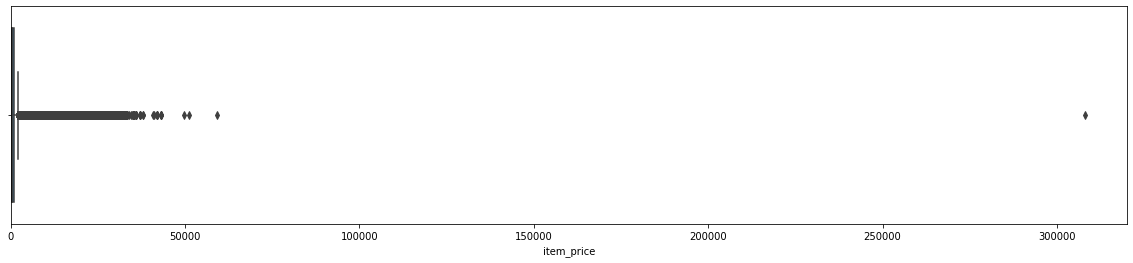

In [28]:
# item_pirce 이상치 확인(Box Plot)
plt.figure(figsize=(20,4))
plt.xlim(train.item_price.min(), 320000)
sns.boxplot(x=train.item_price)

# item_price 이상치 index 확인(45,000 루블 이상)
train[train.item_price>45000]

# item_price 이상치 제거
train = train.drop(index = [885138, 1163158, 1488135, 232719] ,axis=0)


### item_cnt_day 이상치 처리<a id= "3.3" />

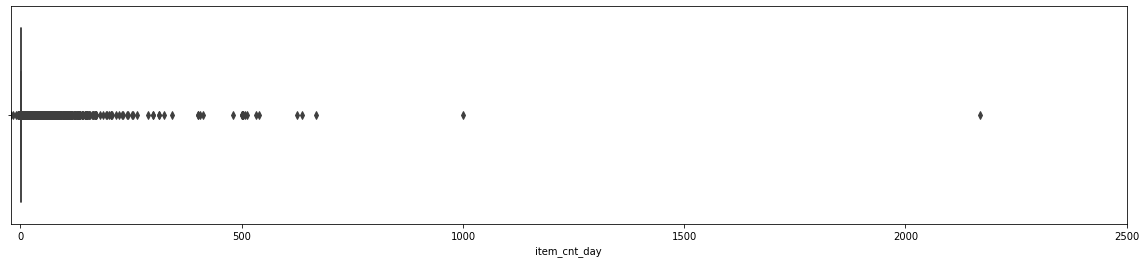

In [29]:
plt.figure(figsize=(20,4))
plt.xlim(train.item_cnt_day.min(), 2500)
sns.boxplot(x=train.item_cnt_day)

# item_cnt_day 이상치 index 확인(900개 이상)
train[train.item_cnt_day>900]

# item_cnt_day 이상치 제거
train = train.drop(index = [2326930, 2909818] ,axis=0)

## 4. Derivation Feature(파생변수)<a id= "4" />

#### 파생변수 - 연별 / 월별 / 샵별 / 아이템별  총판매량

In [30]:
train.head()

,year,month,day,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category_name,item_price,item_cnt_day
0,2013,1,2,0,59,"Yaroslavl TC ""Altair""",22154,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.00,1.0
1,2013,1,3,0,25,"Москва ТРК ""Атриум""",2552,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,899.00,1.0
2,2013,1,5,0,25,"Москва ТРК ""Атриум""",2552,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,899.00,-1.0
3,2013,1,6,0,25,"Москва ТРК ""Атриум""",2554,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,1709.05,1.0
4,2013,1,15,0,25,"Москва ТРК ""Атриум""",2555,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,1099.00,1.0


In [31]:
train_2 = train.groupby(['year', 'month', 'shop_id', 'item_id']).agg(np.sum).item_cnt_day
train_2 = pd.DataFrame(train_2).reset_index()
train_2 #2013 , 2014, 2015(10까지)

,year,month,shop_id,item_id,item_cnt_day
0,2013,1,0,32,6.0
1,2013,1,0,33,3.0
2,2013,1,0,35,1.0
3,2013,1,0,43,1.0
4,2013,1,0,51,2.0
...,...,...,...,...,...
1609116,2015,10,59,22087,6.0
1609117,2015,10,59,22088,2.0
1609118,2015,10,59,22091,1.0
1609119,2015,10,59,22100,1.0


### template 제작<a id= "4.0" />

In [32]:
template = pd.read_csv('temp_to_send.csv')
template

,shop_id,item_id
0,59,22154
1,59,2573
2,59,2574
3,59,2607
4,59,2546
...,...,...
424119,55,2736
424120,55,1819
424121,55,2390
424122,55,1935


In [33]:
years = [2013, 2014, 2015]
months = [1,2,3,4,5,6,7,8,9,10,11,12]

for year in years:
  for month in months:
    if (year == 2015) & (month  == 11):
      break
    train_y_m = train_2[train_2.year == year][train_2.month == month].drop(['year', 'month'], axis = 1)
    template = pd.merge(template, train_y_m, on=['shop_id', 'item_id'], how='left')

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [34]:
#template 제작과정이 필요하다

In [35]:
template_column_lst = ['shop_id', 'item_id', '2013_1',
 '2013_2',
 '2013_3',
 '2013_4',
 '2013_5',
 '2013_6',
 '2013_7',
 '2013_8',
 '2013_9',
 '2013_10',
 '2013_11',
 '2013_12',
 '2014_1',
 '2014_2',
 '2014_3',
 '2014_4',
 '2014_5',
 '2014_6',
 '2014_7',
 '2014_8',
 '2014_9',
 '2014_10',
 '2014_11',
 '2014_12',
 '2015_1',
 '2015_2',
 '2015_3',
 '2015_4',
 '2015_5',
 '2015_6',
 '2015_7',
 '2015_8',
 '2015_9',
 '2015_10']

In [36]:
template.columns = template_column_lst
template = template.fillna(0)

#### 구글에서 조사한 샵별 위도, 경도 
#### 구글에서 조사한 샵별 지역과 인구수 <a id= "4.0.1" />

In [37]:
# 샵별 위도 경도 컬럼
N_E = ['62.025173_129.720232', 
 '62.031050_129.738358', 
 '45.012745_38.930380', 
 '55.797801_37.938447', 
 '48.771953_44.799820', 
 '59.211624_39.880350',
 '51.663607_39.197213',
 '51.696888_39.273251',
 '51.788890_39.204999',
 '0_0',
 '55.597068_38.123647',
 '55.597068_38.123651',
 '0_0',
 '55.863114_49.084688',
 '55.829494_49.117868',
 '54.516108_36.246523',
 '55.083909_38.801003',
 '56.034478_92.907737',
 '56.037267_92.934535',
 '51.737992_36.192407',
 '55.702794_37.735900',
 '55.748955_37.539729',
 '55.760993_37.610690',
 '55.758075_37.741328',
 '55.758075_37.741328',
 '55.757262_37.659089',
 '55.643788_37.526460',
 '55.658320_37.845215',
 '55.604199_37.491871',
 '55.737751_37.857074',
 '55.891909_37.727590',
 '55.782863_37.720300',
 '55.782122_37.704086',
 '55.916570_37.757608',
 '56.318215_43.925338',
 '56.307313_44.074853',
 '55.043753_82.922617',
 '54.964283_82.936314',
 '54.971968_73.284423',
 '47.259730_39.719443',
 '47.259730_39.719443',
 '47.290012_39.846990',
 '59.931721_30.359419',
 '59.925121_30.320677',
 '53.209073_50.136976',
 '53.233390_50.200778',
 '56.303568_38.133246',
 '61.239462_73.372959',
 '56.488607_84.979135',
 '57.117498_65.549317',
 '57.148789_65.560006',
 '57.169949_65.567479',
 '54.736371_55.956069',
 '54.749698_56.000192',
 '55.911008_37.396487',
 '0_0',
 '55.153370_37.459241',
 '62.025173_129.720232',
 '62.031050_129.738358',
 '57.697788_39.758954'] 

In [38]:
local_population = ['Yakutsk_328000',
         'Yakutsk_328000',
         'Adygeya_453376',
         'Moskva_10381222',
         'Volzhsky_323293',
         'Vologda_314900',
         'Voronezh_848752',
         'Voronezh_848752',
         'Voronezh_848752',
         'None_0',
         'Moskva_10381222',
         'Moskva_10381222',
         'online_0',
         'Kazan_1104738',
         'Kazan_1104738',
         'Kaluga_338978',
         'Moskva_10381222',
         'Krasnoyarsk_337091',
         'Krasnoyarsk_337091', 
         'Kursk_409431',
         'Moskva_10381222',
         'Moskva_10381222',
         'Moskva_10381222',
         'Moskva_10381222',
         'Moskva_10381222',
         'Moskva_10381222',
         'Moskva_10381222',
         'Moskva_10381222',
         'Moskva_10381222',
         'Moskva_10381222',
         'Moskva_10381222',
         'Moskva_10381222',
         'Moskva_10381222',
         'Moskva_10381222',
         'N.Novgorod_1284164',
         'N.Novgorod_1284164',
         'Novosibirsk_1419007',
         'Novosibirsk_1419007',
         'Omsk_1129281',
         'RostovNaDonu_1074482',
         'RostovNaDonu_1074482',
         'RostovNaDonu_1074482',
         'SPb_5028000',
         'SPb_5028000',
         'Samara_1134730',
         'Samara_1134730',
         'Moskva_10381222',
         'Surgut_300367',
         'Tomsk_485519',
         'Tyumen_519119',
         'Tyumen_519119',
         'Tyumen_519119',
         'Ufa_1033338',
         'Ufa_1033338',
         'Moskva_10381222',
         'online_0',
         'Chekhov_446781',
         'Yakutsk_328000',
         'Yakutsk_328000',
         'Yaroslavl_606730'
]

In [39]:
shops = pd.read_csv('data/shops.csv')
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [40]:
shops['N_E'] = N_E
shops['local_population'] = local_population


name_split = shops["N_E"].str.split("_")
shops["N"] = name_split.str.get(0)
shops["E"] = name_split.str.get(1)


name_split_2 = shops["local_population"].str.split("_")
shops["local"] = name_split_2.str.get(0)
shops["population"] = name_split_2.str.get(1)

shops.drop(['shop_name', 'N_E', 'local_population'], axis=1, inplace=True)

In [41]:
shops['N'] = pd.to_numeric(shops['N'])
shops['E'] = pd.to_numeric(shops['E'])

In [42]:
nearshop = []
index_i = []
index_j = []
for i in range(0, 60):
  for j in range(0, 60):
    if i != j:
      a = (shops.N[i] - shops.N[j]) **2 + (shops.E[i] - shops.E[j]) ** 2
      nearshop.append(a)
      index_i.append(i)
      index_j.append(j)
      #0, 57 // 1, 58  // 11,12 // 39, 40

In [43]:
df = pd.DataFrame(index_i)
df.columns = ['index_i']
df['index_j'] = index_j
df['nearshop'] = nearshop

In [44]:
#가장 가까운 매장과의 거리

nearest_shop = []
for i in range(0, 60):
  a = df[df.index_i == i].nearshop.min()
  nearest_shop.append(a)

      #0, 57 // 1, 58  // 11,12 // 39, 40

shop_0 = df[df.index_i == 0].nearshop.tolist()
shop_0_57 = sorted(shop_0)
#shop_0_57[1]
shop_1 = df[df.index_i == 1].nearshop.tolist()
shop_1_58 = sorted(shop_1)
#shop_1_58[1]
shop_10 = df[df.index_i == 10].nearshop.tolist()
shop_10_11 = sorted(shop_10)
#shop_10_11[1]
shop_23 = df[df.index_i == 23].nearshop.tolist()
shop_23_24 = sorted(shop_23)
#shop_23_24[1]
shop_39 = df[df.index_i == 39].nearshop.tolist()
shop_39_40 = sorted(shop_39)
#shop_39_40[1]

#동일한 매장이 존재하여 0값인 경우 두번째로 가까운 거리 구하기

nearest_shop[0] = shop_0_57[1]
nearest_shop[57] = shop_0_57[1]
nearest_shop[1] = shop_1_58[1]
nearest_shop[58] = shop_1_58[1]
nearest_shop[10] = shop_10_11[1]
nearest_shop[11] = shop_10_11[1]
nearest_shop[23] = shop_23_24[1]
nearest_shop[24] = shop_23_24[1]
nearest_shop[39] = shop_39_40[1]
nearest_shop[40] = shop_39_40[1]

In [45]:
shops['nearest_shop'] = nearest_shop

In [46]:
template = pd.merge(template, shops, on='shop_id', how='left')

In [47]:
template['population'] = pd.to_numeric(template['population'])

In [48]:
template

,shop_id,item_id,2013_1,2013_2,2013_3,2013_4,2013_5,2013_6,2013_7,2013_8,...,2015_6,2015_7,2015_8,2015_9,2015_10,N,E,local,population,nearest_shop
0,59,22154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,57.697788,39.758954,Yaroslavl,606730,2.306436
1,59,2573,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,57.697788,39.758954,Yaroslavl,606730,2.306436
2,59,2574,2.0,1.0,1.0,0.0,0.0,0.0,3.0,2.0,...,0.0,1.0,0.0,0.0,0.0,57.697788,39.758954,Yaroslavl,606730,2.306436
3,59,2607,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,57.697788,39.758954,Yaroslavl,606730,2.306436
4,59,2546,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,57.697788,39.758954,Yaroslavl,606730,2.306436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,55,2736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,online,0,0.000000
424120,55,1819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.000000,0.000000,online,0,0.000000
424121,55,2390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,online,0,0.000000
424122,55,1935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,online,0,0.000000


### 할인율 계산 max - min / max 
### 전기간 아이템별 price max, min <a id= "4.1" />

In [49]:
price_df_all_max = pd.DataFrame(train.groupby(['item_id']).item_price.max()).reset_index()
price_df_all_max.drop_duplicates(['item_id'])
price_df_all_max.columns = ['item_id', 'price_all_max']


price_df_all_min = pd.DataFrame(train.groupby(['item_id']).item_price.min()).reset_index()
price_df_all_min.drop_duplicates(['item_id'])
price_df_all_min.columns = ['item_id','price_all_min']

In [50]:
price_df_all_max['price_all_min'] = price_df_all_min['price_all_min']
price_df_all_max['sale_percent_item_all_p'] =  (price_df_all_max['price_all_max'] - price_df_all_max['price_all_min']) / price_df_all_max['price_all_max']


In [51]:
template = pd.merge(template, price_df_all_max, on='item_id', how='left') 

In [52]:
template.head()

,shop_id,item_id,2013_1,2013_2,2013_3,2013_4,2013_5,2013_6,2013_7,2013_8,...,2015_9,2015_10,N,E,local,population,nearest_shop,price_all_max,price_all_min,sale_percent_item_all_p
0,59,22154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,57.697788,39.758954,Yaroslavl,606730,2.306436,999.0,299.00,0.700701
1,59,2573,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,57.697788,39.758954,Yaroslavl,606730,2.306436,299.0,190.00,0.364548
2,59,2574,2.0,1.0,1.0,0.0,0.0,0.0,3.0,2.0,...,0.0,0.0,57.697788,39.758954,Yaroslavl,606730,2.306436,449.0,172.27,0.616325
3,59,2607,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,57.697788,39.758954,Yaroslavl,606730,2.306436,299.0,116.07,0.611806
4,59,2546,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,57.697788,39.758954,Yaroslavl,606730,2.306436,299.0,161.00,0.461538


### 1달 / 2달 / 3달 / 6달/ 12달로 묶어 해당 묶음달들에 대한 평균 판매량<a id= "4.2" />

In [53]:
month_num = train.date_block_num.unique().tolist()
m_num = pd.DataFrame(month_num)
m_num.columns = ['date_block_num']

lag_12 = []
for i in range(len(month_num)):
  a = month_num[i] // 12 
  lag_12.append(a)

lag_6 = []
for i in range(len(month_num)):
  a = month_num[i] // 6 
  lag_6.append(a)

lag_3 = []
for i in range(len(month_num)):
  a = month_num[i] // 3  
  lag_3.append(a)

lag_2 = []
for i in range(len(month_num)):
  a = month_num[i] // 2  
  lag_2.append(a) 

m_num['lag_12'] = lag_12
m_num['lag_6'] = lag_6
m_num['lag_3'] = lag_3
m_num['lag_2'] = lag_2

train = pd.merge(train, m_num, on='date_block_num', how='left')

In [54]:
train.head()

,year,month,day,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category_name,item_price,item_cnt_day,lag_12,lag_6,lag_3,lag_2
0,2013,1,2,0,59,"Yaroslavl TC ""Altair""",22154,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.00,1.0,0,0,0,0
1,2013,1,3,0,25,"Москва ТРК ""Атриум""",2552,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,899.00,1.0,0,0,0,0
2,2013,1,5,0,25,"Москва ТРК ""Атриум""",2552,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,899.00,-1.0,0,0,0,0
3,2013,1,6,0,25,"Москва ТРК ""Атриум""",2554,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,1709.05,1.0,0,0,0,0
4,2013,1,15,0,25,"Москва ТРК ""Атриум""",2555,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,1099.00,1.0,0,0,0,0


In [55]:
shop_item_cnt_lag1_mean = pd.DataFrame(train.groupby(['shop_id', 'item_id', 'date_block_num']).item_cnt_day.mean()).reset_index()
shop_item_cnt_lag2_mean = pd.DataFrame(train.groupby(['shop_id', 'item_id', 'lag_2']).item_cnt_day.mean()).reset_index()
shop_item_cnt_lag3_mean = pd.DataFrame(train.groupby(['shop_id', 'item_id', 'lag_3']).item_cnt_day.mean()).reset_index()
shop_item_cnt_lag6_mean = pd.DataFrame(train.groupby(['shop_id', 'item_id', 'lag_6']).item_cnt_day.mean()).reset_index()
shop_item_cnt_lag12_mean = pd.DataFrame(train.groupby(['shop_id', 'item_id', 'lag_12']).item_cnt_day.mean()).reset_index()

##### lag_12

In [56]:
lag_12_cnt_mean = shop_item_cnt_lag12_mean.drop_duplicates(['shop_id','item_id'])

lag_12_cnt_0 =lag_12_cnt_mean[lag_12_cnt_mean.lag_12 == 0].drop(['lag_12'],axis=1)
lag_12_cnt_1 =lag_12_cnt_mean[lag_12_cnt_mean.lag_12 == 1].drop(['lag_12'],axis=1)
lag_12_cnt_2 =lag_12_cnt_mean[lag_12_cnt_mean.lag_12 == 2].drop(['lag_12'],axis=1)

In [57]:
template = pd.merge(template, lag_12_cnt_0, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_12_cnt_1, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_12_cnt_2, on=['shop_id','item_id'], how='left')

##### lag_6

In [58]:
lag_6_cnt_mean = shop_item_cnt_lag6_mean.drop_duplicates(['shop_id','item_id'])

lag_6_cnt_0 =lag_6_cnt_mean[lag_6_cnt_mean.lag_6 == 0].drop(['lag_6'],axis=1)
lag_6_cnt_1 =lag_6_cnt_mean[lag_6_cnt_mean.lag_6 == 1].drop(['lag_6'],axis=1)
lag_6_cnt_2 =lag_6_cnt_mean[lag_6_cnt_mean.lag_6 == 2].drop(['lag_6'],axis=1)
lag_6_cnt_3 =lag_6_cnt_mean[lag_6_cnt_mean.lag_6 == 3].drop(['lag_6'],axis=1)
lag_6_cnt_4 =lag_6_cnt_mean[lag_6_cnt_mean.lag_6 == 4].drop(['lag_6'],axis=1)
lag_6_cnt_5 =lag_6_cnt_mean[lag_6_cnt_mean.lag_6 == 5].drop(['lag_6'],axis=1)

In [59]:
template = pd.merge(template, lag_6_cnt_0, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_6_cnt_1, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_6_cnt_2, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_6_cnt_3, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_6_cnt_4, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_6_cnt_5, on=['shop_id','item_id'], how='left')

##### lag_3

In [60]:
lag_3_cnt_mean = shop_item_cnt_lag3_mean.drop_duplicates(['shop_id','item_id'])

lag_3_cnt_0 =lag_3_cnt_mean[lag_3_cnt_mean.lag_3 == 0].drop(['lag_3'],axis=1)
lag_3_cnt_1 =lag_3_cnt_mean[lag_3_cnt_mean.lag_3 == 1].drop(['lag_3'],axis=1)
lag_3_cnt_2 =lag_3_cnt_mean[lag_3_cnt_mean.lag_3 == 2].drop(['lag_3'],axis=1)
lag_3_cnt_3 =lag_3_cnt_mean[lag_3_cnt_mean.lag_3 == 3].drop(['lag_3'],axis=1)
lag_3_cnt_4 =lag_3_cnt_mean[lag_3_cnt_mean.lag_3 == 4].drop(['lag_3'],axis=1)
lag_3_cnt_5 =lag_3_cnt_mean[lag_3_cnt_mean.lag_3 == 5].drop(['lag_3'],axis=1)
lag_3_cnt_6 =lag_3_cnt_mean[lag_3_cnt_mean.lag_3 == 6].drop(['lag_3'],axis=1)
lag_3_cnt_7 =lag_3_cnt_mean[lag_3_cnt_mean.lag_3 == 7].drop(['lag_3'],axis=1)
lag_3_cnt_8 =lag_3_cnt_mean[lag_3_cnt_mean.lag_3 == 8].drop(['lag_3'],axis=1)
lag_3_cnt_9 =lag_3_cnt_mean[lag_3_cnt_mean.lag_3 == 9].drop(['lag_3'],axis=1)
lag_3_cnt_10 =lag_3_cnt_mean[lag_3_cnt_mean.lag_3 == 10].drop(['lag_3'],axis=1)
lag_3_cnt_11 =lag_3_cnt_mean[lag_3_cnt_mean.lag_3 == 11].drop(['lag_3'],axis=1)

In [61]:
template = pd.merge(template, lag_3_cnt_0, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_3_cnt_1, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_3_cnt_2, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_3_cnt_3, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_3_cnt_4, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_3_cnt_5, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_3_cnt_6, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_3_cnt_7, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_3_cnt_8, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_3_cnt_9, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_3_cnt_10, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_3_cnt_11, on=['shop_id','item_id'], how='left')

##### lag_2

In [62]:
lag_2_cnt_mean = shop_item_cnt_lag2_mean.drop_duplicates(['shop_id','item_id'])

lag_2_cnt_0 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 0].drop(['lag_2'],axis=1)
lag_2_cnt_1 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 1].drop(['lag_2'],axis=1)
lag_2_cnt_2 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 2].drop(['lag_2'],axis=1)
lag_2_cnt_3 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 3].drop(['lag_2'],axis=1)
lag_2_cnt_4 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 4].drop(['lag_2'],axis=1)
lag_2_cnt_5 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 5].drop(['lag_2'],axis=1)
lag_2_cnt_6 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 6].drop(['lag_2'],axis=1)
lag_2_cnt_7 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 7].drop(['lag_2'],axis=1)
lag_2_cnt_8 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 8].drop(['lag_2'],axis=1)
lag_2_cnt_9 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 9].drop(['lag_2'],axis=1)
lag_2_cnt_10 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 10].drop(['lag_2'],axis=1)
lag_2_cnt_11 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 11].drop(['lag_2'],axis=1)
lag_2_cnt_12 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 12].drop(['lag_2'],axis=1)
lag_2_cnt_13 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 13].drop(['lag_2'],axis=1)
lag_2_cnt_14 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 14].drop(['lag_2'],axis=1)
lag_2_cnt_15 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 15].drop(['lag_2'],axis=1)
lag_2_cnt_16 =lag_2_cnt_mean[lag_2_cnt_mean.lag_2 == 16].drop(['lag_2'],axis=1)

In [63]:
template = pd.merge(template, lag_2_cnt_0, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_1, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_2, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_3, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_4, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_5, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_6, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_7, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_8, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_9, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_10, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_11, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_12, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_13, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_14, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_15, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_2_cnt_16, on=['shop_id','item_id'], how='left')

##### lag_1(date_block_num)

In [64]:
lag_1_cnt_mean = shop_item_cnt_lag1_mean.drop_duplicates(['shop_id','item_id'])

lag_1_cnt_0 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 0].drop(['date_block_num'],axis=1)
lag_1_cnt_1 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 1].drop(['date_block_num'],axis=1)
lag_1_cnt_2 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 2].drop(['date_block_num'],axis=1)
lag_1_cnt_3 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 3].drop(['date_block_num'],axis=1)
lag_1_cnt_4 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 4].drop(['date_block_num'],axis=1)
lag_1_cnt_5 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 5].drop(['date_block_num'],axis=1)
lag_1_cnt_6 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 6].drop(['date_block_num'],axis=1)
lag_1_cnt_7 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 7].drop(['date_block_num'],axis=1)
lag_1_cnt_8 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 8].drop(['date_block_num'],axis=1)
lag_1_cnt_9 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 9].drop(['date_block_num'],axis=1)
lag_1_cnt_10 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 10].drop(['date_block_num'],axis=1)
lag_1_cnt_11 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 11].drop(['date_block_num'],axis=1)
lag_1_cnt_12 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 12].drop(['date_block_num'],axis=1)
lag_1_cnt_13 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 13].drop(['date_block_num'],axis=1)
lag_1_cnt_14 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 14].drop(['date_block_num'],axis=1)
lag_1_cnt_15 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 15].drop(['date_block_num'],axis=1)
lag_1_cnt_16 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 16].drop(['date_block_num'],axis=1)
lag_1_cnt_17 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 17].drop(['date_block_num'],axis=1)
lag_1_cnt_18 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 18].drop(['date_block_num'],axis=1)
lag_1_cnt_19 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 19].drop(['date_block_num'],axis=1)
lag_1_cnt_20 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 20].drop(['date_block_num'],axis=1)
lag_1_cnt_21 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 21].drop(['date_block_num'],axis=1)
lag_1_cnt_22 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 22].drop(['date_block_num'],axis=1)
lag_1_cnt_23 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 23].drop(['date_block_num'],axis=1)
lag_1_cnt_24 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 24].drop(['date_block_num'],axis=1)
lag_1_cnt_25 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 25].drop(['date_block_num'],axis=1)
lag_1_cnt_26 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 26].drop(['date_block_num'],axis=1)
lag_1_cnt_27 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 27].drop(['date_block_num'],axis=1)
lag_1_cnt_28 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 28].drop(['date_block_num'],axis=1)
lag_1_cnt_29 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 29].drop(['date_block_num'],axis=1)
lag_1_cnt_30 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 30].drop(['date_block_num'],axis=1)
lag_1_cnt_31 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 31].drop(['date_block_num'],axis=1)
lag_1_cnt_32 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 32].drop(['date_block_num'],axis=1)
lag_1_cnt_33 =lag_1_cnt_mean[lag_1_cnt_mean.date_block_num == 33].drop(['date_block_num'],axis=1)

In [65]:
template = pd.merge(template, lag_1_cnt_0, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_1, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_2, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_3, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_4, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_5, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_6, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_7, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_8, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_9, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_10, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_11, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_12, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_13, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_14, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_15, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_16, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_17, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_18, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_19, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_20, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_21, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_22, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_23, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_24, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_25, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_26, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_27, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_28, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_29, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_30, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_31, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_32, on=['shop_id','item_id'], how='left')
template = pd.merge(template, lag_1_cnt_33, on=['shop_id','item_id'], how='left')

In [66]:
for i in range(3):
  print("'lag_12_cnt_{}',".format(i))

for i in range(6):
  print("'lag_6_cnt_{}',".format(i))

for i in range(12):
  print("'lag_3_cnt_{}',".format(i))  

for i in range(17):
  print("'lag_2_cnt_{}',".format(i))  

for i in range(34):
  print("'lag_1_cnt_{}',".format(i))  

'lag_12_cnt_0',
'lag_12_cnt_1',
'lag_12_cnt_2',
'lag_6_cnt_0',
'lag_6_cnt_1',
'lag_6_cnt_2',
'lag_6_cnt_3',
'lag_6_cnt_4',
'lag_6_cnt_5',
'lag_3_cnt_0',
'lag_3_cnt_1',
'lag_3_cnt_2',
'lag_3_cnt_3',
'lag_3_cnt_4',
'lag_3_cnt_5',
'lag_3_cnt_6',
'lag_3_cnt_7',
'lag_3_cnt_8',
'lag_3_cnt_9',
'lag_3_cnt_10',
'lag_3_cnt_11',
'lag_2_cnt_0',
'lag_2_cnt_1',
'lag_2_cnt_2',
'lag_2_cnt_3',
'lag_2_cnt_4',
'lag_2_cnt_5',
'lag_2_cnt_6',
'lag_2_cnt_7',
'lag_2_cnt_8',
'lag_2_cnt_9',
'lag_2_cnt_10',
'lag_2_cnt_11',
'lag_2_cnt_12',
'lag_2_cnt_13',
'lag_2_cnt_14',
'lag_2_cnt_15',
'lag_2_cnt_16',
'lag_1_cnt_0',
'lag_1_cnt_1',
'lag_1_cnt_2',
'lag_1_cnt_3',
'lag_1_cnt_4',
'lag_1_cnt_5',
'lag_1_cnt_6',
'lag_1_cnt_7',
'lag_1_cnt_8',
'lag_1_cnt_9',
'lag_1_cnt_10',
'lag_1_cnt_11',
'lag_1_cnt_12',
'lag_1_cnt_13',
'lag_1_cnt_14',
'lag_1_cnt_15',
'lag_1_cnt_16',
'lag_1_cnt_17',
'lag_1_cnt_18',
'lag_1_cnt_19',
'lag_1_cnt_20',
'lag_1_cnt_21',
'lag_1_cnt_22',
'lag_1_cnt_23',
'lag_1_cnt_24',
'lag_1_cnt_25',
'lag_1_cnt_2

In [67]:
lag_columns = ['lag_12_cnt_0',
'lag_12_cnt_1',
'lag_12_cnt_2',
'lag_6_cnt_0',
'lag_6_cnt_1',
'lag_6_cnt_2',
'lag_6_cnt_3',
'lag_6_cnt_4',
'lag_6_cnt_5',
'lag_3_cnt_0',
'lag_3_cnt_1',
'lag_3_cnt_2',
'lag_3_cnt_3',
'lag_3_cnt_4',
'lag_3_cnt_5',
'lag_3_cnt_6',
'lag_3_cnt_7',
'lag_3_cnt_8',
'lag_3_cnt_9',
'lag_3_cnt_10',
'lag_3_cnt_11',
'lag_2_cnt_0',
'lag_2_cnt_1',
'lag_2_cnt_2',
'lag_2_cnt_3',
'lag_2_cnt_4',
'lag_2_cnt_5',
'lag_2_cnt_6',
'lag_2_cnt_7',
'lag_2_cnt_8',
'lag_2_cnt_9',
'lag_2_cnt_10',
'lag_2_cnt_11',
'lag_2_cnt_12',
'lag_2_cnt_13',
'lag_2_cnt_14',
'lag_2_cnt_15',
'lag_2_cnt_16',
'lag_1_cnt_0',
'lag_1_cnt_1',
'lag_1_cnt_2',
'lag_1_cnt_3',
'lag_1_cnt_4',
'lag_1_cnt_5',
'lag_1_cnt_6',
'lag_1_cnt_7',
'lag_1_cnt_8',
'lag_1_cnt_9',
'lag_1_cnt_10',
'lag_1_cnt_11',
'lag_1_cnt_12',
'lag_1_cnt_13',
'lag_1_cnt_14',
'lag_1_cnt_15',
'lag_1_cnt_16',
'lag_1_cnt_17',
'lag_1_cnt_18',
'lag_1_cnt_19',
'lag_1_cnt_20',
'lag_1_cnt_21',
'lag_1_cnt_22',
'lag_1_cnt_23',
'lag_1_cnt_24',
'lag_1_cnt_25',
'lag_1_cnt_26',
'lag_1_cnt_27',
'lag_1_cnt_28',
'lag_1_cnt_29',
'lag_1_cnt_30',
'lag_1_cnt_31',
'lag_1_cnt_32',
'lag_1_cnt_33']

In [68]:
len(lag_columns)

72

In [69]:
template.columns = template.columns.tolist()[:44] + lag_columns

In [70]:
template

,shop_id,item_id,2013_1,2013_2,2013_3,2013_4,2013_5,2013_6,2013_7,2013_8,...,lag_1_cnt_24,lag_1_cnt_25,lag_1_cnt_26,lag_1_cnt_27,lag_1_cnt_28,lag_1_cnt_29,lag_1_cnt_30,lag_1_cnt_31,lag_1_cnt_32,lag_1_cnt_33
0,59,22154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,2573,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59,2574,2.0,1.0,1.0,0.0,0.0,0.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,59,2607,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59,2546,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,55,2736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
424120,55,1819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
424121,55,2390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
424122,55,1935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## 아이템별 전체기간 평균 price  - global_item_price
## 샾별 아이템별 전체기간 평균 price - local_item_price
## global_item_price - local_item_price = delta_price(절댓값) <a id= "4.3" />

In [71]:
global_item_price = pd.DataFrame(train.groupby('item_id').item_price.mean()).reset_index()
global_item_price = global_item_price.drop_duplicates('item_id')

shop_item_price = pd.DataFrame(train.groupby(['shop_id', 'item_id']).item_price.mean())
local_item_price = shop_item_price.reset_index().drop_duplicates(['shop_id','item_id'])

In [72]:
template = pd.merge(template, global_item_price, on='item_id', how='left')
template = pd.merge(template, local_item_price, on=['shop_id','item_id'], how='left')
template.columns = template.columns.tolist()[:-2] + ['global_item_price' ,'local_item_price']
template.head()

,shop_id,item_id,2013_1,2013_2,2013_3,2013_4,2013_5,2013_6,2013_7,2013_8,...,lag_1_cnt_26,lag_1_cnt_27,lag_1_cnt_28,lag_1_cnt_29,lag_1_cnt_30,lag_1_cnt_31,lag_1_cnt_32,lag_1_cnt_33,global_item_price,local_item_price
0,59,22154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,702.932203,999.000000
1,59,2573,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.155556,249.000000
2,59,2574,2.0,1.0,1.0,0.0,0.0,0.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401.398686,403.545455
3,59,2607,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.472832,294.012500
4,59,2546,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.387500,299.000000


In [73]:
template['delta_price'] = template['global_item_price'] - template['local_item_price']
template['delta_price'] = template['delta_price'].abs()

In [74]:
template = template.fillna(0)

In [75]:
template.to_csv('data/template_not_preprocessing.csv', index=False)
#전처리 안된 template

In [76]:
template.columns.tolist()

['shop_id',
 'item_id',
 '2013_1',
 '2013_2',
 '2013_3',
 '2013_4',
 '2013_5',
 '2013_6',
 '2013_7',
 '2013_8',
 '2013_9',
 '2013_10',
 '2013_11',
 '2013_12',
 '2014_1',
 '2014_2',
 '2014_3',
 '2014_4',
 '2014_5',
 '2014_6',
 '2014_7',
 '2014_8',
 '2014_9',
 '2014_10',
 '2014_11',
 '2014_12',
 '2015_1',
 '2015_2',
 '2015_3',
 '2015_4',
 '2015_5',
 '2015_6',
 '2015_7',
 '2015_8',
 '2015_9',
 '2015_10',
 'N',
 'E',
 'local',
 'population',
 'nearest_shop',
 'price_all_max',
 'price_all_min',
 'sale_percent_item_all_p',
 'lag_12_cnt_0',
 'lag_12_cnt_1',
 'lag_12_cnt_2',
 'lag_6_cnt_0',
 'lag_6_cnt_1',
 'lag_6_cnt_2',
 'lag_6_cnt_3',
 'lag_6_cnt_4',
 'lag_6_cnt_5',
 'lag_3_cnt_0',
 'lag_3_cnt_1',
 'lag_3_cnt_2',
 'lag_3_cnt_3',
 'lag_3_cnt_4',
 'lag_3_cnt_5',
 'lag_3_cnt_6',
 'lag_3_cnt_7',
 'lag_3_cnt_8',
 'lag_3_cnt_9',
 'lag_3_cnt_10',
 'lag_3_cnt_11',
 'lag_2_cnt_0',
 'lag_2_cnt_1',
 'lag_2_cnt_2',
 'lag_2_cnt_3',
 'lag_2_cnt_4',
 'lag_2_cnt_5',
 'lag_2_cnt_6',
 'lag_2_cnt_7',
 'lag_2_

In [77]:
template['population'] = pd.to_numeric(template['population'])

In [78]:
template.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424124 entries, 0 to 424123
Columns: 119 entries, shop_id to delta_price
dtypes: float64(115), int64(3), object(1)
memory usage: 388.3+ MB


## 두연님과 주화님의 코딩 'nearest shop'<a id="4.4" />

In [79]:
pd.cut(template['nearest_shop'], 5) #길이로

0         (-0.0393, 7.858]
1         (-0.0393, 7.858]
2         (-0.0393, 7.858]
3         (-0.0393, 7.858]
4         (-0.0393, 7.858]
                ...       
424119    (-0.0393, 7.858]
424120    (-0.0393, 7.858]
424121    (-0.0393, 7.858]
424122    (-0.0393, 7.858]
424123    (-0.0393, 7.858]
Name: nearest_shop, Length: 424124, dtype: category
Categories (5, interval[float64]): [(-0.0393, 7.858] < (7.858, 15.716] < (15.716, 23.574] < (23.574, 31.431] < (31.431, 39.289]]

### nearest length로 그룹화

In [80]:
template['nearest_range_len'] = 1

In [81]:
for i in range(len(template)):
    if template['nearest_shop'][i] <= 7.858:
        template['nearest_range_len'][i] = 1
    elif template['nearest_shop'][i] <= 15.716:
        template['nearest_range_len'][i] = 2
    elif template['nearest_shop'][i] <= 23.574:
        template['nearest_range_len'][i] = 3
    elif template['nearest_shop'][i] <= 31.431:
        template['nearest_range_len'][i] = 4
    else:
        template['nearest_range_len'][i] = 5

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [82]:
template['nearest_range_len'].value_counts()

1    401547
5     15268
4      7309
Name: nearest_range_len, dtype: int64

##### 인구 x 근접샵 거리 그룹(length기준)

In [83]:
##### 인구 x 근접샵 거리 그룹(length기준)

In [84]:
template['pop_x_nearest_len'] = template['population'] * template['nearest_range_len']

### nearest size로 그룹화

In [85]:
pd.qcut(template['nearest_shop'], 5)

0            (0.204, 39.289]
1            (0.204, 39.289]
2            (0.204, 39.289]
3            (0.204, 39.289]
4            (0.204, 39.289]
                 ...        
424119    (-0.001, 0.000726]
424120    (-0.001, 0.000726]
424121    (-0.001, 0.000726]
424122    (-0.001, 0.000726]
424123    (-0.001, 0.000726]
Name: nearest_shop, Length: 424124, dtype: category
Categories (5, interval[float64]): [(-0.001, 0.000726] < (0.000726, 0.00236] < (0.00236, 0.0065] < (0.0065, 0.204] < (0.204, 39.289]]

In [86]:
template['nearest_range_size'] = 1

In [87]:
for i in range(len(template)):
    if template['nearest_shop'][i] <= 0.000726:
        template['nearest_range_size'][i] = 1
    elif template['nearest_shop'][i] <= 0.00236:
        template['nearest_range_size'][i] = 2
    elif template['nearest_shop'][i] <=  0.0065:
        template['nearest_range_size'][i] = 3
    elif template['nearest_shop'][i] <= 0.204:
        template['nearest_range_size'][i] = 4
    else:
        template['nearest_range_size'][i] = 5

C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Playdata\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Playdat

In [88]:
template['nearest_range_size'].value_counts()

2    96510
5    93309
1    87429
4    79279
3    67597
Name: nearest_range_size, dtype: int64

### 인구 x 근접샵 거리 그룹(size기준)

In [89]:
template['pop_x_nearest_size'] = template['population'] * template['nearest_range_size'] 

### 인구수_근접샵거리에 대한 가중치 생성

In [90]:
template.head()

,shop_id,item_id,2013_1,2013_2,2013_3,2013_4,2013_5,2013_6,2013_7,2013_8,...,lag_1_cnt_31,lag_1_cnt_32,lag_1_cnt_33,global_item_price,local_item_price,delta_price,nearest_range_len,pop_x_nearest_len,nearest_range_size,pop_x_nearest_size
0,59,22154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,702.932203,999.000000,296.067797,1,606730,5,3033650
1,59,2573,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,254.155556,249.000000,5.155556,1,606730,5,3033650
2,59,2574,2.0,1.0,1.0,0.0,0.0,0.0,3.0,2.0,...,0.0,0.0,0.0,401.398686,403.545455,2.146769,1,606730,5,3033650
3,59,2607,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,292.472832,294.012500,1.539668,1,606730,5,3033650
4,59,2546,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,292.387500,299.000000,6.612500,1,606730,5,3033650


In [91]:
template.to_csv('data/all.csv', index=False)

In [92]:
template = pd.read_csv('data/all.csv')

## 매장별 top3 아이템<a id="4.5" />

In [93]:
shop_cnt_item = pd.DataFrame(train.groupby(['shop_id', 'item_category_name']).sum()['item_cnt_day'])

In [94]:
shop_cnt_item = shop_cnt_item.reset_index()  

In [95]:
shop_cnt_item.head()

,shop_id,item_category_name,item_cnt_day
0,0,PC - Гарнитуры/Наушники,1.0
1,0,Аксессуары - PS2,1.0
2,0,Аксессуары - PS3,105.0
3,0,Аксессуары - PS4,52.0
4,0,Аксессуары - PSP,38.0


In [96]:
for i in range(60):
    items_ranking = pd.DataFrame(shop_cnt_item.loc[shop_cnt_item["shop_id"] ==i].sort_values(by='item_cnt_day', ascending=False)[0:3])
    if i == 0:
        shops_top3_items_cnt = items_ranking
    else :
        concat = [shops_top3_items_cnt, items_ranking]
        shops_top3_items_cnt = pd.concat(concat)  

In [97]:
items_m = items.drop(['item_name'], axis=1)

In [98]:
items_m

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40
...,...,...
22165,22165,31
22166,22166,54
22167,22167,49
22168,22168,62


In [99]:
template = pd.merge(template, items_m, on='item_id', how='left')
template = pd.merge(template, item_categories, on='item_category_id', how='left')


In [100]:
template

,shop_id,item_id,2013_1,2013_2,2013_3,2013_4,2013_5,2013_6,2013_7,2013_8,...,lag_1_cnt_33,global_item_price,local_item_price,delta_price,nearest_range_len,pop_x_nearest_len,nearest_range_size,pop_x_nearest_size,item_category_id,item_category_name
0,59,22154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,702.932203,999.000000,296.067797,1,606730,5,3033650,37,Кино - Blu-Ray
1,59,2573,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,254.155556,249.000000,5.155556,1,606730,5,3033650,55,Музыка - CD локального производства
2,59,2574,2.0,1.0,1.0,0.0,0.0,0.0,3.0,2.0,...,0.0,401.398686,403.545455,2.146769,1,606730,5,3033650,55,Музыка - CD локального производства
3,59,2607,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,292.472832,294.012500,1.539668,1,606730,5,3033650,55,Музыка - CD локального производства
4,59,2546,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,292.387500,299.000000,6.612500,1,606730,5,3033650,55,Музыка - CD локального производства
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,55,2736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,399.000000,399.000000,0.000000,1,0,1,0,31,Игры PC - Цифра
424120,55,1819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1499.000000,1499.000000,0.000000,1,0,1,0,31,Игры PC - Цифра
424121,55,2390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,99.000000,99.000000,0.000000,1,0,1,0,31,Игры PC - Цифра
424122,55,1935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,249.000000,249.000000,0.000000,1,0,1,0,31,Игры PC - Цифра


In [101]:
shops_top3_items_cnt.drop(['item_cnt_day'], axis=1, inplace=True)

In [102]:
shops_top3_items_cnt['shop_top_3_items'] = 1

In [103]:
shops_top3_items_cnt

,shop_id,item_category_name,shop_top_3_items
23,0,Кино - DVD,1
18,0,Игры PC - Стандартные издания,1
28,0,Музыка - CD локального производства,1
69,1,Кино - DVD,1
64,1,Игры PC - Стандартные издания,1
...,...,...,...
3176,58,Игры PC - Стандартные издания,1
3171,58,Игры - XBOX 360,1
3234,59,Игры PC - Стандартные издания,1
3241,59,Кино - DVD,1


In [104]:
template = pd.merge(template, shops_top3_items_cnt, on=['shop_id','item_category_name'], how='left')

In [105]:
template = template.fillna(0)

In [106]:
template.shop_top_3_items.value_counts()

0.0    253299
1.0    170825
Name: shop_top_3_items, dtype: int64

In [107]:
template.to_csv('data/template_8_14.csv', index=False)

In [108]:
template = pd.read_csv('data/template_8_14.csv')

In [109]:
template

,shop_id,item_id,2013_1,2013_2,2013_3,2013_4,2013_5,2013_6,2013_7,2013_8,...,global_item_price,local_item_price,delta_price,nearest_range_len,pop_x_nearest_len,nearest_range_size,pop_x_nearest_size,item_category_id,item_category_name,shop_top_3_items
0,59,22154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,702.932203,999.000000,296.067797,1,606730,5,3033650,37,Кино - Blu-Ray,0.0
1,59,2573,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,254.155556,249.000000,5.155556,1,606730,5,3033650,55,Музыка - CD локального производства,1.0
2,59,2574,2.0,1.0,1.0,0.0,0.0,0.0,3.0,2.0,...,401.398686,403.545455,2.146769,1,606730,5,3033650,55,Музыка - CD локального производства,1.0
3,59,2607,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,292.472832,294.012500,1.539668,1,606730,5,3033650,55,Музыка - CD локального производства,1.0
4,59,2546,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,292.387500,299.000000,6.612500,1,606730,5,3033650,55,Музыка - CD локального производства,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,55,2736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,399.000000,399.000000,0.000000,1,0,1,0,31,Игры PC - Цифра,1.0
424120,55,1819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1499.000000,1499.000000,0.000000,1,0,1,0,31,Игры PC - Цифра,1.0
424121,55,2390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99.000000,99.000000,0.000000,1,0,1,0,31,Игры PC - Цифра,1.0
424122,55,1935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,249.000000,249.000000,0.000000,1,0,1,0,31,Игры PC - Цифра,1.0


# **Label** 인코딩<a id="4.6" />

In [108]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(template['local'])
template['local'] = encoder.transform(template['local'])

encoder.fit(template['item_category_name'])
template['item_category_name'] = encoder.transform(template['item_category_name'])

# test 파일 만들기<a id="4.7" />

In [109]:
test = pd.read_csv('data/test.csv')
test.drop(['ID'], axis=1, inplace=True)

In [110]:
test = pd.merge(test, template, on=['shop_id', 'item_id'], how='left')

In [111]:
test = test.drop_duplicates(['shop_id', 'item_id'], keep='first')
test = test.fillna(0)

In [112]:
test

,shop_id,item_id,2013_1,2013_2,2013_3,2013_4,2013_5,2013_6,2013_7,2013_8,...,global_item_price,local_item_price,delta_price,nearest_range_len,pop_x_nearest_len,nearest_range_size,pop_x_nearest_size,item_category_id,item_category_name,shop_top_3_items
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1.0,314900.0,5.0,1574500.0,55.0,54.0,1.0
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,800.777500,865.666667,64.889167,1.0,314900.0,5.0,1574500.0,19.0,19.0,0.0
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1.0,314900.0,5.0,1574500.0,20.0,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217532,45,18454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,188.681084,187.888889,0.792195,1.0,1134730.0,3.0,3404190.0,55.0,54.0,1.0
217533,45,16188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217534,45,15757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,198.113208,199.000000,0.886792,1.0,1134730.0,3.0,3404190.0,55.0,54.0,1.0
217535,45,19648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 모델링<a id="5" />

In [113]:
y_train = template['2015_10']
X_train = template.drop(['2015_10'], axis=1)
#X_train_X = template.drop(['2015_10'], axis=1)


In [114]:
#test['item_cnt_month'] = 0

In [115]:
#X_test = test.drop(['item_cnt_month'], axis=1)
#X_test_X = test.drop(['item_cnt_month'], axis=1)
#y_test = test.item_cnt_month

## PCA 진행<a id="5.0" />

In [116]:
y_train = template['2015_10']
X_train = template.drop(['shop_id','item_id','2015_10'], axis=1)
X_train_X = template.drop(['shop_id','item_id','2015_10'], axis=1)

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_train_X.columns)
#X_train.describe()

#X_test = scaler.fit_transform(X_test)
#X_test = pd.DataFrame(X_test, columns=X_test_X.columns)
#X_test.describe()

In [ ]:
#test['item_cnt_month'] = 0

In [ ]:
#X_test = test.drop(['item_cnt_month'], axis=1)
#X_test_X = test.drop(['item_cnt_month'], axis=1)
#y_test = test.item_cnt_month

In [118]:
X_train

,2013_1,2013_2,2013_3,2013_4,2013_5,2013_6,2013_7,2013_8,2013_9,2013_10,...,global_item_price,local_item_price,delta_price,nearest_range_len,pop_x_nearest_len,nearest_range_size,pop_x_nearest_size,item_category_id,item_category_name,shop_top_3_items
0,0.497541,-0.173159,-0.161701,-0.180047,-0.120351,-0.085092,-0.096303,-0.096333,-0.076011,-0.083549,...,-0.051249,0.171557,1.631625,-0.235115,-0.874839,1.382828,-0.653121,-0.420177,-0.408652,-0.821219
1,-0.188227,-0.173159,-0.161701,-0.180047,0.381796,-0.085092,-0.096303,-0.096333,-0.076011,-0.083549,...,-0.306943,-0.288982,-0.317490,-0.235115,-0.874839,1.382828,-0.653121,0.712484,0.688233,1.217702
2,1.183308,0.477318,0.331211,-0.180047,-0.120351,-0.085092,1.011036,0.597076,0.180501,0.225621,...,-0.223050,-0.194083,-0.337649,-0.235115,-0.874839,1.382828,-0.653121,0.712484,0.688233,1.217702
3,-0.188227,-0.173159,0.331211,-0.180047,-0.120351,0.220070,0.272810,-0.096333,-0.076011,0.843962,...,-0.285112,-0.261342,-0.341717,-0.235115,-0.874839,1.382828,-0.653121,0.712484,0.688233,1.217702
4,-0.188227,0.477318,-0.161701,0.563621,-0.120351,-0.085092,-0.096303,-0.096333,-0.076011,-0.083549,...,-0.285160,-0.258280,-0.307729,-0.235115,-0.874839,1.382828,-0.653121,0.712484,0.688233,1.217702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,-0.188227,-0.173159,-0.161701,-0.180047,-0.120351,-0.085092,-0.096303,-0.096333,-0.076011,-0.083549,...,-0.224417,-0.196874,-0.352033,-0.235115,-1.007002,-1.365105,-0.852752,-0.797731,-0.795788,1.217702
424120,-0.188227,-0.173159,-0.161701,-0.180047,-0.120351,-0.085092,-0.096303,-0.096333,-0.076011,-0.083549,...,0.402319,0.478584,-0.352033,-0.235115,-1.007002,-1.365105,-0.852752,-0.797731,-0.795788,1.217702
424121,-0.188227,-0.173159,-0.161701,-0.180047,-0.120351,-0.085092,-0.096303,-0.096333,-0.076011,-0.083549,...,-0.395345,-0.381090,-0.352033,-0.235115,-1.007002,-1.365105,-0.852752,-0.797731,-0.795788,1.217702
424122,-0.188227,-0.173159,-0.161701,-0.180047,-0.120351,-0.085092,-0.096303,-0.096333,-0.076011,-0.083549,...,-0.309881,-0.288982,-0.352033,-0.235115,-1.007002,-1.365105,-0.852752,-0.797731,-0.795788,1.217702


In [119]:
#다음 코드는 차원을 축소하지 않고 PCA를 계산한 뒤 훈련 세트의 분산을 95%로 유지하는 데
#필요한 최소한의 차원 수를 계산합니다.
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [120]:
d

53

In [121]:
pca = PCA(n_components = d)
X_train = pca.fit_transform(X_train)

In [122]:
X_train = pd.DataFrame(X_train)

In [123]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.412509,-1.670462,-0.265563,1.009985,0.433177,-0.585315,-0.791962,-1.116655,-2.164016,0.173455,...,-0.077924,-1.660865,0.199855,-0.142281,-0.203035,0.815408,-0.717233,1.180110,-1.469976,-0.268569
1,-0.164548,-1.270752,-0.115715,0.054433,-0.999858,0.211036,1.888697,-3.071704,2.702718,0.882812,...,1.435859,0.071424,0.119145,0.003899,1.118403,0.228040,-0.674265,1.212084,-1.105906,-0.537051
2,0.804824,-2.308019,-0.313126,1.345711,-0.297763,-0.140240,0.257420,-0.584187,-2.578094,-0.019335,...,1.410621,0.087301,-0.150257,0.111328,0.001615,0.591876,0.118656,1.583056,-1.020811,-0.344598
3,0.592085,-1.789539,-0.234308,0.752454,-0.709496,0.078985,0.900256,-1.663206,-1.065419,0.594904,...,1.480077,-0.016089,-0.195746,-0.301002,0.302898,0.065034,-0.002829,2.079084,-0.287705,0.427147
4,-0.432734,-2.071776,-0.270922,1.140737,-0.455879,-0.042566,0.463422,-0.745903,-2.222507,0.091651,...,1.376515,0.265622,-0.049118,-0.093808,-0.234983,0.684427,-0.400410,1.181290,-1.352650,-0.009911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,-0.785812,3.367801,-2.923134,0.240823,1.022251,-3.947094,4.372215,0.931402,-0.886202,1.269488,...,-1.299808,2.883260,-1.612535,0.026915,0.148796,0.243983,-0.482148,-0.073246,0.150772,0.003985
424120,-0.891223,6.113426,-5.986745,0.900862,3.407362,-8.379816,7.190441,2.929809,-0.724761,2.780127,...,-1.148010,3.034531,-1.294534,0.075970,0.091683,0.053212,-0.248864,0.186219,-0.063603,-0.009710
424121,-0.787371,3.277800,-2.901595,0.253267,0.849556,-3.833618,4.573692,1.029200,-0.915177,1.268322,...,-1.347468,2.821537,-1.620362,0.025053,0.152777,0.271067,-0.548711,-0.080808,0.162891,0.001399
424122,-0.786592,3.322800,-2.912365,0.247045,0.935903,-3.890356,4.472954,0.980301,-0.900690,1.268905,...,-1.323638,2.852398,-1.616448,0.025984,0.150787,0.257525,-0.515430,-0.077027,0.156832,0.002692


In [124]:
tem_shop_item = template[['shop_id','item_id']]

In [125]:
X_train = pd.concat([tem_shop_item, X_train], axis=1)

In [126]:
X_train

,shop_id,item_id,0,1,2,3,4,5,6,7,...,43,44,45,46,47,48,49,50,51,52
0,59,22154,-0.412509,-1.670462,-0.265563,1.009985,0.433177,-0.585315,-0.791962,-1.116655,...,-0.077924,-1.660865,0.199855,-0.142281,-0.203035,0.815408,-0.717233,1.180110,-1.469976,-0.268569
1,59,2573,-0.164548,-1.270752,-0.115715,0.054433,-0.999858,0.211036,1.888697,-3.071704,...,1.435859,0.071424,0.119145,0.003899,1.118403,0.228040,-0.674265,1.212084,-1.105906,-0.537051
2,59,2574,0.804824,-2.308019,-0.313126,1.345711,-0.297763,-0.140240,0.257420,-0.584187,...,1.410621,0.087301,-0.150257,0.111328,0.001615,0.591876,0.118656,1.583056,-1.020811,-0.344598
3,59,2607,0.592085,-1.789539,-0.234308,0.752454,-0.709496,0.078985,0.900256,-1.663206,...,1.480077,-0.016089,-0.195746,-0.301002,0.302898,0.065034,-0.002829,2.079084,-0.287705,0.427147
4,59,2546,-0.432734,-2.071776,-0.270922,1.140737,-0.455879,-0.042566,0.463422,-0.745903,...,1.376515,0.265622,-0.049118,-0.093808,-0.234983,0.684427,-0.400410,1.181290,-1.352650,-0.009911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,55,2736,-0.785812,3.367801,-2.923134,0.240823,1.022251,-3.947094,4.372215,0.931402,...,-1.299808,2.883260,-1.612535,0.026915,0.148796,0.243983,-0.482148,-0.073246,0.150772,0.003985
424120,55,1819,-0.891223,6.113426,-5.986745,0.900862,3.407362,-8.379816,7.190441,2.929809,...,-1.148010,3.034531,-1.294534,0.075970,0.091683,0.053212,-0.248864,0.186219,-0.063603,-0.009710
424121,55,2390,-0.787371,3.277800,-2.901595,0.253267,0.849556,-3.833618,4.573692,1.029200,...,-1.347468,2.821537,-1.620362,0.025053,0.152777,0.271067,-0.548711,-0.080808,0.162891,0.001399
424122,55,1935,-0.786592,3.322800,-2.912365,0.247045,0.935903,-3.890356,4.472954,0.980301,...,-1.323638,2.852398,-1.616448,0.025984,0.150787,0.257525,-0.515430,-0.077027,0.156832,0.002692


In [127]:
test = pd.read_csv('data/test.csv')
test.drop(['ID'], axis=1, inplace=True)

In [128]:
test

,shop_id,item_id
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
...,...,...
214195,45,18454
214196,45,16188
214197,45,15757
214198,45,19648


In [129]:
test = pd.merge(test, X_train, on=['shop_id', 'item_id'], how='left')
test = test.drop_duplicates()
print(len(test))

214200


In [130]:
test['item_cnt_month'] = 0

In [ ]:
#test_2015 = template[['shop_id','item_id','2015_10']]

In [ ]:
#test = pd.merge(test, test_2015, on=['shop_id','item_id'], how='left')

In [ ]:
#test = test.fillna(0)

In [131]:
X_test = test.drop(['item_cnt_month'], axis=1)
#X_test_X = test.drop(['item_cnt_month'], axis=1)
y_test = test.item_cnt_month

In [ ]:
'''import matplotlib.pyplot as plt
import numpy as np

flg2 = plt.figure() 
chart = flg2.add_subplot(1, 1, 1)

chart.plot(cumsum, label='line', color='g')

#d값은 n_components = 53 '''

In [ ]:
'''from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_test)
cumsum_y = np.cumsum(pca.explained_variance_ratio_)
d_y = np.argmax(cumsum_y >= 0.95) + 1

#47개 하지만 train test 차원축소 컬럼개수를 동일하게 구성해야한다.'''

In [ ]:
'''import matplotlib.pyplot as plt
import numpy as np

flg2 = plt.figure() 
chart = flg2.add_subplot(1, 1, 1)

chart.plot(cumsum_y, label='line', color='g')

#d값은 n_components = 47 '''

## Light GBM<a id="5.1" />

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
                                                    test_size=0.3)

In [134]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [135]:
import lightgbm as lgb

In [136]:
X_train

,shop_id,item_id,0,1,2,3,4,5,6,7,...,43,44,45,46,47,48,49,50,51,52
190130,57,16524,0.524107,1.902956,2.056397,-0.743038,-3.694977,-0.900176,-0.346931,-0.601526,...,0.125256,0.653332,-0.888462,0.579112,-0.294151,0.779474,0.293343,0.675892,-0.073978,0.194559
105632,42,15343,3.353943,-1.834736,0.166539,-8.968559,4.610798,3.719376,0.220439,2.160414,...,-0.780884,-1.784060,-0.107209,0.594883,-0.011521,-0.341658,0.549234,0.480163,-0.143786,-1.445945
89163,54,14374,0.458460,-0.952883,0.190353,-2.861922,1.213412,1.611411,0.307354,2.890780,...,-0.849536,-0.639852,0.600321,-0.252350,0.004883,-0.396227,0.506335,0.748136,-0.556141,-0.355702
359235,3,5377,-0.646484,0.742641,-0.138853,0.014056,0.618703,-0.430735,-0.826376,1.114478,...,0.185040,-0.346723,-0.367535,-0.125165,0.044800,-0.064877,0.891078,0.268747,-0.256731,0.111914
230944,47,3346,0.189720,4.028496,3.472316,0.992487,2.442649,-0.327485,-0.625998,-4.652094,...,-0.702245,0.946401,0.455874,-0.428051,-1.553977,-2.583151,-0.922525,0.764315,0.062566,-1.132980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387036,5,418,-0.712161,0.824471,0.060030,-0.456033,-0.929230,0.110382,1.039539,-1.215167,...,0.449178,-0.673320,0.540197,-0.062161,0.074949,0.448882,-0.674696,0.471708,-0.286470,0.001527
65441,7,7797,-0.267827,3.076762,1.921259,-0.978260,-0.988751,-2.937875,-4.025928,-1.288103,...,0.305200,-0.454458,-0.255873,0.059880,-0.145876,0.305726,0.365754,0.976607,-0.615512,-0.073017
232713,21,2973,0.448798,-3.450689,-0.511716,2.343213,1.939638,-1.175502,-2.892581,1.728643,...,-1.003256,-0.948090,0.067848,0.040799,-0.754764,0.174682,0.601088,0.205237,-0.668096,0.229290
281186,19,7076,-0.180320,-2.081668,-0.461835,1.244684,1.464330,-1.226710,-1.734315,-2.280620,...,0.852591,-0.955054,1.557431,0.129860,0.369311,-0.881073,0.494508,0.359478,0.831304,0.228335


In [137]:
train_ds = lgb.Dataset(X_train, label = y_train) 
test_ds = lgb.Dataset(X_test, label = y_test) 

In [138]:
params = {'learning_rate': 0.0001, 
          'max_depth': 32, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 169, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018,
         'nrounds' : 1000}

In [139]:
#set(template.columns.tolist()) - set(test.columns.tolist())

In [140]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 4.04835
[200]	valid_0's l2: 4.02648
[300]	valid_0's l2: 4.00528
[400]	valid_0's l2: 3.98343
[500]	valid_0's l2: 3.96079
[600]	valid_0's l2: 3.93884
[700]	valid_0's l2: 3.91751
[800]	valid_0's l2: 3.89637
[900]	valid_0's l2: 3.87553
[1000]	valid_0's l2: 3.85554
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 3.85554


In [141]:
# accuracy score가 아니라 mse 와 rmse 로 확인 0에 가까울 수록 좋다. 
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse) #루트 씌q워서... 따로 제공해 주는게 없어서..

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)')
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


MSE : 3.856 , RMSE : 1.964
Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)
Variance score : 0.053


In [ ]:
'''
MSE : 0.027 , RMSE : 0.164
Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)
Variance score : 0.000


0.0001

MSE : 1.358 , RMSE : 1.165
Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)
Variance score : 0.088

{'learning_rate': 0.0001, 
          'max_depth': 32, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 169, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018,
         'nrounds' : 2000}

''''''

In [142]:
test.drop('item_cnt_month', axis=1, inplace=True)
test.fillna(0, inplace=True)


In [ ]:
y_preds = model.predict(test)

In [ ]:
for i in range(len(y_preds)) :
    if y_preds[i] > 20 :
        y_preds[i] = 20
    elif y_preds[i] < 0 :
        y_preds[i] = 0
y_preds

## LightGBM Regressor -> rmse 1.14949<a id="5.2" />

In [143]:
from lightgbm import LGBMRegressor

lightgbmregressor=LGBMRegressor(
        n_estimators=200,
        learning_rate=0.03,
        num_leaves=32,
        colsample_bytree=0.9497036,
        subsample=0.8715623,
        max_depth=8,
        reg_alpha=0.04,
        reg_lambda=0.073,
        min_split_gain=0.0222415,
        min_child_weight=40)


In [144]:
lightgbmregressor.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.9497036, importance_type='split',
              learning_rate=0.03, max_depth=8, min_child_samples=20,
              min_child_weight=40, min_split_gain=0.0222415, n_estimators=200,
              n_jobs=-1, num_leaves=32, objective=None, random_state=None,
              reg_alpha=0.04, reg_lambda=0.073, silent=True,
              subsample=0.8715623, subsample_for_bin=200000, subsample_freq=0)

In [145]:
# accuracy score가 아니라 mse 와 rmse 로 확인 0에 가까울 수록 좋다. 
y_preds = lightgbmregressor.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse) #루트 씌q워서... 따로 제공해 주는게 없어서..

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)')
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 1.963 , RMSE : 1.401
Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)
Variance score : 0.518


In [146]:
y_preds = lightgbmregressor.predict(test).clip(0., 20.)
y_preds

array([0.0189935 , 0.00982242, 0.44015757, ..., 0.02142494, 0.0189935 ,
       0.06234551])

# random forest regressor

In [ ]:
'''
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regression OLS로 학습/예측/평가 수행. 

rf = RandomForestRegressor(n_estimators=1000)
rf.fit(X_train ,y_train )
y_preds = rf.predict(X_test)

# accuracy score가 아니라 mse 와 rmse 로 확인 0에 가까울 수록 좋다. 
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse) #루트 씌워서... 따로 제공해 주는게 없어서..

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)')
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
'''

### XGBoost Regressor Grid-SearchCV

In [ ]:
'''
xgb1 = XGBRegressor()

'''
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

'''


xgb_grid = GridSearchCV(xgb1,
                        n_estimators=500,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
'''

### GridSearch LightGBM

In [ ]:
'''
param_set = {
    'n_estimators':[20, 50]
}

gsearch = GridSearchCV(estimator = LGBMClassifier( boosting_type='gbdt', num_leaves=30, max_depth=5, learning_rate=0.1, n_estimators=50, max_bin=225, 
    subsample_for_bin=0.8, objective=None, min_split_gain=0, 
    min_child_weight=5, 
    min_child_samples=10, subsample=1, subsample_freq=1, 
colsample_bytree=1, 
reg_alpha=1, reg_lambda=0, seed=410, nthread=7, silent=True), 
param_grid = param_set, scoring='roc_auc',n_jobs=7,iid=False, cv=10)

lgb_model2 = gsearch.fit(features_train, label_train)
lgb_model2.grid_scores_, lgb_model2.best_params_, lgb_model2.best_score_
'''

# Bayesian-optimization rmse : 1.13012 <a id="5.3" />
### AutoML – Bayesian Optimization
#### 베이지안 최적화 - 최적 하이퍼파라미터 조합을 모델기반의 최적화 기법 활용하여 탐색

- 탐색 대상 함수와 해당 하이퍼파라미터를 쌍(pair)을 대상으로 Surrogate Model 을 만들고, 평가를 통해 순차적으로 업데이트해 가면서 최적의 하이퍼파라미터 조합을 탐색한다.

빨간색 점선은 우리가 찾으려고 하는 unknown black box function f(x)를 나타내고, 
검정색 선은 지금까지 관측한 데이터를 바탕으로 우리가 예측한 estimated function ^f(x)의 expectation을 의미한다.
검정색 선 주변에 있는 회색 영역은 function f(x)가 존재할 confidence bound(function의 variance)  : 잔차

밑에 있는 EI(x)는 위에서 언급한 acquisition function을 의미한다.
EI(x)값이 높은 것 : 잔차가 큰 것 (잘못 예측할 가능성이 높은 것)
잔차(회색 Boundary)를 줄이기 위해 값이 컸던 지점의 function 값을 후, point를 추가해 estimation을 update한다.(그림2)

update 후에는 함수의 회색 영역이 크게 줄어들며, 좌측 부분와 우측 부분의 불확실성을 줄이기 위해, 다음 관측할 point를 acquisition function을 통해 설정한다. 이때 사용하는 것이 파리미터이고, 파라미터 조합을 통해 Boundary, 잔차가 제일 적은 최적의 조합을 찾는다. 



출처: https://jeongchul.tistory.com/546 [Jeongchul]

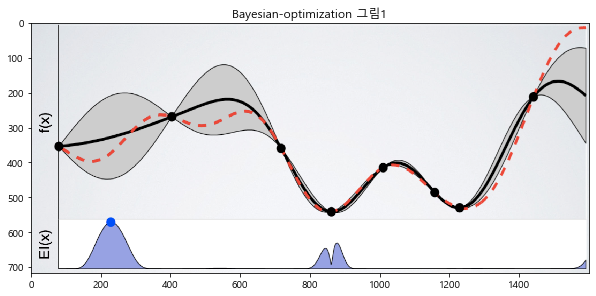

In [206]:
import tensorflow as tf
import matplotlib.pyplot as plt

file_path1 = tf.keras.utils.get_file('bayesian-optimization.jpg', 
                                   'https://lh4.googleusercontent.com/e2VdWPdFnTuC9FkcRrzszsNbjuoKLj-_NRuUQUI4AIjO9Qwk8x4l-Leg49qFts5z0FIATcX-0vm5VX1PiS8MP6hhOCI467MpLHd3TNjFIGgksKS3oswMltCfOw8OB1vwtAgRiroJ')

img = tf.io.read_file(file_path1)
img_tensor = tf.image.decode_image(img)

plt.figure(figsize=(10,5))
plt.title('Bayesian-optimization 그림1')
plt.imshow(img_tensor)

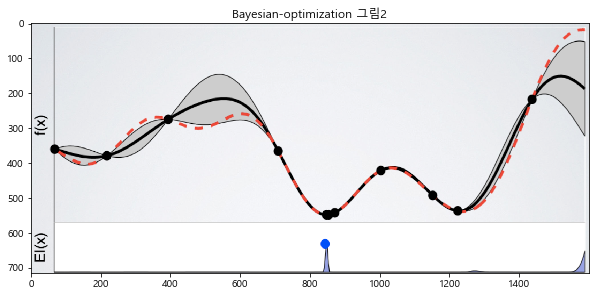

In [203]:
import tensorflow as tf
import matplotlib.pyplot as plt

file_path2 = tf.keras.utils.get_file('bayesian-optimization2.jpg', 
                                    'https://lh4.googleusercontent.com/4hmGmZXLxx4YXuApVsW1K0IZMyYoED8wqlWlAYVicoMlHe6IeNa9FD1s6DcnU-m60b3a3DBNmnA9juA-8DY8L4op5lM_z_XJALqfPcJMB2z91FDwSMkMkVomJzv4iBm0WvvqAdq2')
img = tf.io.read_file(file_path2)
img_tensor = tf.image.decode_image(img)
plt.figure(figsize=(10,5))
plt.title('Bayesian-optimization 그림2')
plt.imshow(img_tensor)

In [147]:
pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11689 sha256=0235b50e8a92926909f0eb3f249f157990f02753f3678bd9376be265dc6b38ae
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\fd\9b\71\f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization
Note: you may need to restart the kernel to use updated packages.


In [148]:
bayes_params = {
    'num_leaves': (24, 45),
    'colsample_bytree':(0.5, 1), 
    'subsample': (0.5, 1),
    'max_depth': (4, 12),
    'reg_alpha': (0, 0.5),
    'reg_lambda': (0, 0.5), 
    'min_split_gain': (0.001, 0.1),
    'min_child_weight':(5, 50)
}

In [149]:
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error

def lgb_roc_eval(num_leaves, colsample_bytree, subsample, max_depth, reg_alpha, reg_lambda, min_split_gain, min_child_weight):
    
    params = {
        "n_estimator":200,
        "learning_rate":0.02,
        'num_leaves': int(round(num_leaves)),
        'colsample_bytree': colsample_bytree, 
        'subsample': subsample,
        'max_depth': int(round(max_depth)),
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda, 
        'min_split_gain': min_split_gain,
        'min_child_weight': min_child_weight,
        'verbosity': -1
    }
    print("params:", params)
    lgb_model = LGBMRegressor(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=30, eval_metric="rmse", verbose=10 )
    best_iter = lgb_model.best_iteration_
    print('best_iter:', best_iter)
    
    y_preds = lgb_model.predict(X_test)
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse) #루트 씌q워서... 따로 제공해 주는게 없어서..

    print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
    print('Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)')
    print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))
    return rmse
    
    

In [150]:
from bayes_opt import BayesianOptimization

BO_lgb = BayesianOptimization(lgb_roc_eval, bayes_params, random_state=0)


In [152]:
BO_lgb.maximize(init_points=5, n_iter=10)

|   iter    |  target   | colsam... | max_depth | min_ch... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------
params: {'n_estimator': 200, 'learning_rate': 0.02, 'num_leaves': 35, 'colsample_bytree': 0.5591372129344666, 'subsample': 0.8871168447171083, 'max_depth': 9, 'reg_alpha': 0.2073309699952618, 'reg_lambda': 0.13227780605231348, 'min_split_gain': 0.09452222278790881, 'min_child_weight': 11.450897933407088, 'verbosity': -1}
Training until validation scores don't improve for 30 rounds
[10]	valid_0's rmse: 1.91028	valid_0's l2: 3.64918
[20]	valid_0's rmse: 1.83131	valid_0's l2: 3.3537
[30]	valid_0's rmse: 1.77032	valid_0's l2: 3.13402
[40]	valid_0's rmse: 1.72277	valid_0's l2: 2.96792
[50]	valid_0's rmse: 1.68203	valid_0's l2: 2.82923
[60]	valid_0's rmse: 1.64412	valid_0's l2: 2.70312
[70]	valid_0's rmse: 1.61156	valid_0's l2: 2.59714
[80]	valid_0's r

In [153]:
BO_lgb.res

[{'target': 1.578225452410482,
  'params': {'colsample_bytree': 0.7744067519636624,
   'max_depth': 9.721514930979357,
   'min_child_weight': 32.12435192322397,
   'min_split_gain': 0.05494343511669279,
   'num_leaves': 32.896750786116996,
   'reg_alpha': 0.32294705653332806,
   'reg_lambda': 0.21879360563134626,
   'subsample': 0.9458865003910399}},
 {'target': 1.600618507485934,
  'params': {'colsample_bytree': 0.9818313802505146,
   'max_depth': 7.067532150606222,
   'min_child_weight': 40.627626713719906,
   'min_split_gain': 0.05336059705553755,
   'num_leaves': 35.92893578297258,
   'reg_alpha': 0.4627983191463305,
   'reg_lambda': 0.03551802909894347,
   'subsample': 0.5435646498507704}},
 {'target': 1.528157182021571,
  'params': {'colsample_bytree': 0.5591372129344666,
   'max_depth': 9.119368170620191,
   'min_child_weight': 11.450897933407088,
   'min_split_gain': 0.09452222278790881,
   'num_leaves': 34.95881475675151,
   'reg_alpha': 0.2073309699952618,
   'reg_lambda': 0.

BayesianOptimization 객체의 max 속성은 최고 높은 성능 Metric를 가질때의 하이퍼 파라미터 값을 가지고 있음.

In [154]:
BO_lgb.max
#float 형태이므로 int로 맞춰준다. 

{'target': 1.6482645516519774,
 'params': {'colsample_bytree': 0.7851736398573754,
  'max_depth': 4.015038683033558,
  'min_child_weight': 49.47386965760671,
  'min_split_gain': 0.02988483323519128,
  'num_leaves': 32.68689393725759,
  'reg_alpha': 0.24861124786116984,
  'reg_lambda': 0.4768754005495075,
  'subsample': 0.8873701216629131}}

In [155]:
max_params = BO_lgb.max['params']

max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['max_depth'] = int(round(max_params['max_depth']))

lightgbmregressor = LGBMRegressor(n_estimators=1000, learning_rate=0.001, **max_params)

evals = [(X_test, y_test)]
lightgbmregressor.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="rmse", eval_set=evals,
                verbose=True)

# accuracy score가 아니라 mse 와 rmse 로 확인 0에 가까울 수록 좋다. 
y_preds = lightgbmregressor.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse) #루트 씌q워서... 따로 제공해 주는게 없어서..

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)')
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

[1]	valid_0's rmse: 2.01712	valid_0's l2: 4.06876
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 2.01665	valid_0's l2: 4.06688
[3]	valid_0's rmse: 2.01627	valid_0's l2: 4.06536
[4]	valid_0's rmse: 2.01586	valid_0's l2: 4.0637
[5]	valid_0's rmse: 2.01552	valid_0's l2: 4.06231
[6]	valid_0's rmse: 2.01505	valid_0's l2: 4.06044
[7]	valid_0's rmse: 2.01464	valid_0's l2: 4.05878
[8]	valid_0's rmse: 2.0142	valid_0's l2: 4.057
[9]	valid_0's rmse: 2.01375	valid_0's l2: 4.05518
[10]	valid_0's rmse: 2.01329	valid_0's l2: 4.05334
[11]	valid_0's rmse: 2.01287	valid_0's l2: 4.05164
[12]	valid_0's rmse: 2.01241	valid_0's l2: 4.04981
[13]	valid_0's rmse: 2.01194	valid_0's l2: 4.04792
[14]	valid_0's rmse: 2.01154	valid_0's l2: 4.04629
[15]	valid_0's rmse: 2.01108	valid_0's l2: 4.04445
[16]	valid_0's rmse: 2.01063	valid_0's l2: 4.04263
[17]	valid_0's rmse: 2.01018	valid_0's l2: 4.04081
[18]	valid_0's rmse: 2.00972	valid_0's l2: 4.03898
[19]	valid_0's rmse: 2.00929	vali

In [ ]:
test.drop('item_cnt_month', axis=1, inplace=True)

In [157]:
y_preds = lightgbmregressor.predict(test).clip(0., 20.)
y_preds

array([0.07976688, 0.07976688, 0.34599202, ..., 0.07976688, 0.07976688,
       0.10138901])

# Randomized Grid Search rmse : 1.12665(Best) <a id="5.4" />
#### Random Search는 모든 grid를 전부 search 하는 대신 random하게 일부의 parameter 들만 관측한 후, 그 중에서 가장 좋은 parameter를 고른다.

In [158]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 100)]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 120, num = 20)]

max_depth.append(None)

# Minimum number of samples required to split a node

min_samples_split = [3,6,9,10]

# Minimum number of samples required at each leaf node

min_samples_leaf = [ 1, 3, 6, 9 ]

# Method of selecting samples for training each tree

bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [100, 119, 138, 157, 176, 195, 215, 234, 253, 272, 291, 311, 330, 349, 368, 387, 407, 426, 445, 464, 483, 503, 522, 541, 560, 579, 598, 618, 637, 656, 675, 694, 714, 733, 752, 771, 790, 810, 829, 848, 867, 886, 906, 925, 944, 963, 982, 1002, 1021, 1040, 1059, 1078, 1097, 1117, 1136, 1155, 1174, 1193, 1213, 1232, 1251, 1270, 1289, 1309, 1328, 1347, 1366, 1385, 1405, 1424, 1443, 1462, 1481, 1501, 1520, 1539, 1558, 1577, 1596, 1616, 1635, 1654, 1673, 1692, 1712, 1731, 1750, 1769, 1788, 1808, 1827, 1846, 1865, 1884, 1904, 1923, 1942, 1961, 1980, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 15, 21, 27, 33, 38, 44, 50, 56, 62, 67, 73, 79, 85, 91, 96, 102, 108, 114, 120, None], 'min_samples_split': [3, 6, 9, 10], 'min_samples_leaf': [1, 3, 6, 9], 'bootstrap': [True, False]}


In [159]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
from lightgbm import LGBMRegressor
lg_cl = LGBMRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

#lg_random = RandomizedSearchCV(estimator = lg_cl, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model

lg_random.fit(X_train, y_train)
print(lg_random.best_estimator_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 47.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 199.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 399.5min finished


LGBMRegressor(boosting_type='gbdt', bootstrap=True, class_weight=None,
              colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
              max_depth=33, max_features='sqrt', min_child_samples=20,
              min_child_weight=0.001, min_samples_leaf=9, min_samples_split=9,
              min_split_gain=0.0, n_estimators=579, n_jobs=-1, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


In [160]:
from lightgbm import LGBMRegressor

lightgbmregressor=LGBMRegressor(boosting_type='gbdt', bootstrap=True, class_weight=None,
              colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
              max_depth=33, max_features='sqrt', min_child_samples=20,
              min_child_weight=0.001, min_samples_leaf=9, min_samples_split=9,
              min_split_gain=0.0, n_estimators=579, n_jobs=-1, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


In [161]:
lightgbmregressor.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', bootstrap=True, class_weight=None,
              colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
              max_depth=33, max_features='sqrt', min_child_samples=20,
              min_child_weight=0.001, min_samples_leaf=9, min_samples_split=9,
              min_split_gain=0.0, n_estimators=579, n_jobs=-1, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [162]:
# accuracy score가 아니라 mse 와 rmse 로 확인 0에 가까울 수록 좋다. 
y_preds = lightgbmregressor.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse) #루트 씌q워서... 따로 제공해 주는게 없어서..

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)')
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 1.359 , RMSE : 1.166
Variance score = R제곱 -> 1에 가까울 수록 좋다 (0과 1사이)
Variance score : 0.666


In [163]:
y_preds = lightgbmregressor.predict(test).clip(0., 20.)
y_preds

array([0.02974068, 0.00456637, 0.49824918, ..., 0.04128884, 0.02864745,
       0.02706854])

# Submission<a id="6" /><a id="6.1" />

In [164]:
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [165]:
len(y_preds)

214200

In [166]:
sample_submission['item_cnt_month'] = y_preds

In [174]:
sample_submission['item_cnt_month'] = round(sample_submission['item_cnt_month'])
sample_submission

,ID,item_cnt_month
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
214195,214195,0.0
214196,214196,0.0
214197,214197,0.0
214198,214198,0.0


In [168]:
sample_submission

,ID,item_cnt_month
0,0,0.029741
1,1,0.004566
2,2,0.498249
3,3,0.029741
4,4,0.000000
...,...,...
214195,214195,0.107304
214196,214196,0.028647
214197,214197,0.041289
214198,214198,0.028647


In [176]:
sample_submission['item_cnt_month'].unique()

array([ 0.,  1.,  6.,  4.,  3.,  2., 16.,  5., 13., 20., 10.,  9., 12.,
       17., 18.,  7.,  8., 15., 11., 14., 19.])

In [ ]:
lightgbm_parameter = sample_submission.copy()

In [177]:
sample_submission.to_csv('data/randomizedGridSearchCVINT.csv', index=False)

In [ ]:
test['item_cnt_month'] = lightgbm_parameter['item_cnt_month']

In [ ]:
CNT_ZERO_2(train, test, test)

In [ ]:
lightgbm_parameter['item_cnt_month'] = test['item_cnt_month']

# 모델링 후 서브미션 파일 수정 - 여태까지 팔리지 않은 값 0으로 대체<a id="6.1" />

In [ ]:
def CNT_ZERO(train, test):
  #test 파일에 있는 아이템 아이디 유니크값을 리스트로 저장
    test_item_id_lst = test.item_id.unique().tolist()
  #test 파일에 있는 샵 아이디 유니크값을 리스트로 저장
    test_shop_id_lst = test.shop_id.unique().tolist()
    
    for test_item in test_item_id_lst : 
    
    #train파일에 test파일에서 뽑아낸 아이템 아이디 유니크값을 넣은 후 샵아이디 유니크 값을 꺼내 리스트로 저장
        train_sell_shop_id = train[train.item_id == test_item].shop_id.unique().tolist()
    #test파일에서 꺼낸 샵아이디 유니크 값 리스트에서 train파일에서 뽑아낸 판매경력이 있는 shop_id 유니크 값 리스트의 차집합을 리스트로 저장
        test_zero_shop_id = list(set(test_shop_id_lst) - set(train_sell_shop_id))

    #저장된 리스트는 해당 아이템에 대한 판매경력이 없는 test파일에서의 shop_id 이기에
    #shop_id 가 test_zero_shop_id 이며 item_id 가 test_item일 때 item_cnt_month가 0이 된다.
        for zero_shop_id in test_zero_shop_id :
            test.loc[(test.shop_id == zero_shop_id) & (test.item_id == test_item), 'item_cnt_month'] = 0

In [ ]:
# train(트레인파일), test_df(테스트파일), test_cat_merge(카테고리값이 포함된 테스트파일)
def CNT_ZERO_2(train, test_df, test_cat_merge) :
    lst_9 = []
    for i in train[train.item_category_id == 9].item_id.unique().tolist() : #카테고리 1 없다.
        if len(test_df[test_df.item_id == i]) != 0:
            lst_9.append(i)
    test_cat_merge.loc[(test_cat_merge['shop_id'] != 12) & (test_cat_merge.item_id.isin(lst_9)), 'item_cnt_month'] = 0

    lst_26 = []
    for i in train[train.item_category_id == 26].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_26.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_26)), 'item_cnt_month'] = 0

    lst_31 = []
    for i in train[train.item_category_id == 31].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_31.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_31)), 'item_cnt_month'] = 0

    lst_34 = []
    for i in train[train.item_category_id == 34].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_34.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_34)), 'item_cnt_month'] = 0

    lst_36 = []
    for i in train[train.item_category_id == 36].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_36.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_36)), 'item_cnt_month'] = 0

    lst_44 = []
    for i in train[train.item_category_id == 44].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_44.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_44)), 'item_cnt_month'] = 0

    lst_54 = []
    for i in train[train.item_category_id == 54].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_54.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_54)), 'item_cnt_month'] = 0

    lst_74 = []
    for i in train[train.item_category_id == 4].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_74.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_74)), 'item_cnt_month'] = 0

    lst_76 = []
    for i in train[train.item_category_id == 31].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_76.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_76)), 'item_cnt_month'] = 0

    lst_78 = []
    for i in train[train.item_category_id == 78].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_78.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_78)), 'item_cnt_month'] = 0

In [ ]:
# train(트레인파일), test_df(테스트파일), test_cat_merge(카테고리값이 포함된 테스트파일)
def CNT_ZERO_2(train, test_df, test_cat_merge) :
    lst_9 = []
    for i in train[train.item_category_id == 9].item_id.unique().tolist() : #카테고리 1 없다.
        if len(test_df[test_df.item_id == i]) != 0:
            lst_9.append(i)
    test_cat_merge.loc[(test_cat_merge['shop_id'] != 12) & (test_cat_merge.item_id.isin(lst_9)), 'item_cnt_month'] = 0

    lst_26 = []
    for i in train[train.item_category_id == 26].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_26.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_26)), 'item_cnt_month'] = 0

    lst_31 = []
    for i in train[train.item_category_id == 31].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_31.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_31)), 'item_cnt_month'] = 0

    lst_34 = []
    for i in train[train.item_category_id == 34].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_34.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_34)), 'item_cnt_month'] = 0

    lst_36 = []
    for i in train[train.item_category_id == 36].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_36.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_36)), 'item_cnt_month'] = 0

    lst_44 = []
    for i in train[train.item_category_id == 44].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_44.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_44)), 'item_cnt_month'] = 0

    lst_54 = []
    for i in train[train.item_category_id == 54].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_54.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_54)), 'item_cnt_month'] = 0

    lst_74 = []
    for i in train[train.item_category_id == 4].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_74.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_74)), 'item_cnt_month'] = 0

    lst_76 = []
    for i in train[train.item_category_id == 31].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_76.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_76)), 'item_cnt_month'] = 0

    lst_78 = []
    for i in train[train.item_category_id == 78].item_id.unique().tolist() : #카테고리 1 없다.
          if len(test_df[test_df.item_id == i]) != 0:
            lst_78.append(i)

    test_cat_merge.loc[(test_cat_merge['shop_id'] != 55) & (test_cat_merge.item_id.isin(lst_78)), 'item_cnt_month'] = 0